Student name: David Schenck<br>
Student pace: Flex<br>
Scheduled project review date/time: <br>
Instructor Name: Morgan Jones<br>
Blog post URL: 

# Project Description

Describe the project here

# Exploring the Data

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

The main dataset contains information about the performance of players in the NFL Combine from 2009 to 2019.<br>
Source: https://www.kaggle.com/datasets/redlineracer/nfl-combine-performance-data-2009-2019

Columns in the dataset:
Year: Year player attended combine<br>
Player: Name of player and a unique code used by pro-football-reference.com.<br>
Age: Age of player when they attended the combine.<br>
School: College the player last attended.<br>
Height: Height of player in meters.<br>
Weight: Weight of player in kg.<br>
Sprint_40yd: Time in the 40-yard sprint.<br>
Vertical_Jump: Height of vertical jump in cm.<br>
Bench_Press_Reps: Number of times player could bench press 225 pounds consecutively.<br>
Broad_Jump: Distance player could jump from a standing position in cm.<br>
Agility_3cone: Time to complete 3-cone drill in seconds.<br>
Shuttle: Time to complete the 60-yard shuttle drill in seconds.<br>
Drafted..tm.rnd.yr.: If drafted, it gives the team, round, pick, and year.<br>
BMI: Body mass index.<br>
Player_Type: Offense, defense, or special teams.<br>
Position_Type: Puts positions into categories.<br>
Position: The specific position the player plays.<br>
Drafted: Yes or No.

**Fixes to Original Data**<br>
The original data had 500 players whose age was missing. This created a problem because only 2% of those players were drafted, but 77% of players with listed ages got drafted. This was a very strong systematic effect that biased the models.<br>

I went through all of the players with missing ages and searched for them online to get the missing data. I still wasn't able to find the ages for 36 of the players, but that is way better than missing 500. I also found that there were other issues with the data:<br>
1. There were 30 players who were listed as going undrafted, but were actually drafted. The vast majority of these were recent (from 2018 and 2019). I fixed these.<br>
2. Some players had the wrong school listed. These were also fixed.

In [449]:
df_combine = pd.read_csv('./Data/NFL.csv')
df_combine

Year                     Player   Age            School  Height  \
0     2009      Beanie Wells\WellCh00  20.0          Ohio St.  1.8542   
1     2009        Will Davis\DaviWi99  22.0          Illinois  1.8796   
2     2009    Herman Johnson\JohnHe23  24.0               LSU  2.0066   
3     2009    Rashad Johnson\JohnRa98  23.0           Alabama  1.8034   
4     2009        Cody Brown\BrowCo96  22.0       Connecticut  1.8796   
...    ...                        ...   ...               ...     ...   
3472  2019   Xavier Crawford\CrawXa00  23.0  Central Michigan  1.8034   
3473  2019               Jordan Brown  22.0  South Dakota St.  1.8288   
3474  2019  Corey Ballentine\BallCo00  22.0          Washburn  1.8034   
3475  2019         Ugo Amadi\AmadUg00  21.0            Oregon  1.7526   
3476  2019    Nasir Adderley\AddeNa00  21.0          Delaware  1.8288   

          Weight  Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  \
0     106.594207         4.38          85.09              25.0      325.12   
1     118.387609         4.84          83.82              27.0      292.10   
2     165.107623         5.50            NaN              21.0         NaN   
3      92.079251         4.49          93.98              15.0      304.80   
4     110.676538         4.76          92.71              26.0      304.80   
...          ...          ...            ...               ...         ...   
3472   84.821773         4.48          95.25              11.0         NaN   
3473   91.172066         4.51         100.33              13.0      325.12   
3474   88.904105         4.47         100.33              15.0      342.90   
3475   90.264882         4.51          82.55              18.0      292.10   
3476   93.440028          NaN            NaN               NaN         NaN   

      Agility_3cone  Shuttle                            Drafted..tm.rnd.yr.  \
0               NaN      NaN     Arizona Cardinals / 1st / 31st pick / 2009   
1              7.38     4.45    Arizona Cardinals / 6th / 204th pick / 2009   
2               NaN      NaN    Arizona Cardinals / 5th / 167th pick / 2009   
3              7.09     4.23     Arizona Cardinals / 3rd / 95th pick / 2009   
4              7.10     4.40     Arizona Cardinals / 2nd / 63rd pick / 2009   
...             ...      ...                                            ...   
3472            NaN      NaN       Houston Texans / 6th / 195th pick / 2019   
3473            NaN      NaN                                            NaN   
3474           6.82     4.14      New York Giants / 6th / 180th pick / 2019   
3475           7.21     4.19     Seattle Seahawks / 4th / 132nd pick / 2019   
3476            NaN      NaN  Los Angeles Chargers / 2nd / 60th pick / 2019   

            BMI Player_Type      Position_Type Position Drafted  
0     31.004194     offense    backs_receivers       RB     Yes  
1     33.510073     defense  defensive_lineman       DE     Yes  
2     41.005821     offense  offensive_lineman       OG     Yes  
3     28.312463     defense     defensive_back       FS     Yes  
4     31.327425     defense        line_backer      OLB     Yes  
...         ...         ...                ...      ...     ...  
3472  26.080939     defense     defensive_back       CB     Yes  
3473  27.260221     defense     defensive_back       CB      No  
3474  27.336171     defense     defensive_back       CB     Yes  
3475  29.386861     defense     defensive_back        S     Yes  
3476  27.938336     defense     defensive_back        S     Yes  

[3477 rows x 18 columns]

The data below lists each player that made the Pro Bowl from 2009 to 2022. The Pro Bowl is the NFL All-Star team; the best few players at each position are chosen each year. This is a good measure of whether or not a player is succeeding as an NFL player.<br>

The only column in this data that I actually care about is Player-additional. This is a unique code for each player that is also included in the "Player" column in the Combine data. I can use this column to count how many Pro Bowls each player in the combine data has been in.

In [450]:
df_probowl = pd.read_excel('./Data/NFLProBowls.xlsx')
df_probowl

Pos           Player Conf   Tm  Age   Yrs Player-additional  Year
0     QB    Lamar Jackson  AFC  BAL   22     1          JackLa00  2019
1     QB   Russell Wilson  NFC  SEA   31     7          WilsRu00  2019
2     QB    Aaron Rodgers  NFC  GNB   36    14          RodgAa00  2019
3     QB   Deshaun Watson  AFC  HOU   24     2          WatsDe00  2019
4     QB  Patrick Mahomes  AFC  KAN   24     2          MahoPa00  2019
...   ..              ...  ...  ...  ...   ...               ...   ...
1625  KR   DeSean Jackson  NFC  PHI   23     1          JackDe00  2009
1626  KR     Percy Harvin  NFC  MIN   21  Rook          HarvPe00  2009
1627  KR      Johnny Knox  NFC  CHI   23  Rook          KnoxJo00  2009
1628  SP    Kassim Osgood  AFC  SDG   29     6          OsgoKa00  2009
1629  SP    Heath Farwell  NFC  MIN   28     4          FarwHe20  2009

[1630 rows x 8 columns]

Below, I split the Player column in the Combine data into the player name and the reference code.<br>
The Player column will now only include the player name. A new column called player_code will hold the reference code.

In [451]:
df_combine['player_code'] = [x[1] if len(x)==2 else None for x in df_combine['Player'].str.split(pat="\\")]
df_combine['Player'] = [x[0] for x in df_combine['Player'].str.split(pat="\\")]
df_combine

Year            Player   Age            School  Height      Weight  \
0     2009      Beanie Wells  20.0          Ohio St.  1.8542  106.594207   
1     2009        Will Davis  22.0          Illinois  1.8796  118.387609   
2     2009    Herman Johnson  24.0               LSU  2.0066  165.107623   
3     2009    Rashad Johnson  23.0           Alabama  1.8034   92.079251   
4     2009        Cody Brown  22.0       Connecticut  1.8796  110.676538   
...    ...               ...   ...               ...     ...         ...   
3472  2019   Xavier Crawford  23.0  Central Michigan  1.8034   84.821773   
3473  2019      Jordan Brown  22.0  South Dakota St.  1.8288   91.172066   
3474  2019  Corey Ballentine  22.0          Washburn  1.8034   88.904105   
3475  2019         Ugo Amadi  21.0            Oregon  1.7526   90.264882   
3476  2019    Nasir Adderley  21.0          Delaware  1.8288   93.440028   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0            4.38          85.09              25.0      325.12            NaN   
1            4.84          83.82              27.0      292.10           7.38   
2            5.50            NaN              21.0         NaN            NaN   
3            4.49          93.98              15.0      304.80           7.09   
4            4.76          92.71              26.0      304.80           7.10   
...           ...            ...               ...         ...            ...   
3472         4.48          95.25              11.0         NaN            NaN   
3473         4.51         100.33              13.0      325.12            NaN   
3474         4.47         100.33              15.0      342.90           6.82   
3475         4.51          82.55              18.0      292.10           7.21   
3476          NaN            NaN               NaN         NaN            NaN   

      Shuttle                            Drafted..tm.rnd.yr.        BMI  \
0         NaN     Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1        4.45    Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2         NaN    Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3        4.23     Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4        4.40     Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   
...       ...                                            ...        ...   
3472      NaN       Houston Texans / 6th / 195th pick / 2019  26.080939   
3473      NaN                                            NaN  27.260221   
3474     4.14      New York Giants / 6th / 180th pick / 2019  27.336171   
3475     4.19     Seattle Seahawks / 4th / 132nd pick / 2019  29.386861   
3476      NaN  Los Angeles Chargers / 2nd / 60th pick / 2019  27.938336   

     Player_Type      Position_Type Position Drafted player_code  
0        offense    backs_receivers       RB     Yes    WellCh00  
1        defense  defensive_lineman       DE     Yes    DaviWi99  
2        offense  offensive_lineman       OG     Yes    JohnHe23  
3        defense     defensive_back       FS     Yes    JohnRa98  
4        defense        line_backer      OLB     Yes    BrowCo96  
...          ...                ...      ...     ...         ...  
3472     defense     defensive_back       CB     Yes    CrawXa00  
3473     defense     defensive_back       CB      No        None  
3474     defense     defensive_back       CB     Yes    BallCo00  
3475     defense     defensive_back        S     Yes    AmadUg00  
3476     defense     defensive_back        S     Yes    AddeNa00  

[3477 rows x 19 columns]

Next, I create another column that counts the number of Pro Bowls for each player.

In [452]:
df_combine['pro_bowls'] = df_combine['player_code'].apply(lambda x: sum(df_probowl['Player-additional']==x))
df_combine

Year            Player   Age            School  Height      Weight  \
0     2009      Beanie Wells  20.0          Ohio St.  1.8542  106.594207   
1     2009        Will Davis  22.0          Illinois  1.8796  118.387609   
2     2009    Herman Johnson  24.0               LSU  2.0066  165.107623   
3     2009    Rashad Johnson  23.0           Alabama  1.8034   92.079251   
4     2009        Cody Brown  22.0       Connecticut  1.8796  110.676538   
...    ...               ...   ...               ...     ...         ...   
3472  2019   Xavier Crawford  23.0  Central Michigan  1.8034   84.821773   
3473  2019      Jordan Brown  22.0  South Dakota St.  1.8288   91.172066   
3474  2019  Corey Ballentine  22.0          Washburn  1.8034   88.904105   
3475  2019         Ugo Amadi  21.0            Oregon  1.7526   90.264882   
3476  2019    Nasir Adderley  21.0          Delaware  1.8288   93.440028   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0            4.38          85.09              25.0      325.12            NaN   
1            4.84          83.82              27.0      292.10           7.38   
2            5.50            NaN              21.0         NaN            NaN   
3            4.49          93.98              15.0      304.80           7.09   
4            4.76          92.71              26.0      304.80           7.10   
...           ...            ...               ...         ...            ...   
3472         4.48          95.25              11.0         NaN            NaN   
3473         4.51         100.33              13.0      325.12            NaN   
3474         4.47         100.33              15.0      342.90           6.82   
3475         4.51          82.55              18.0      292.10           7.21   
3476          NaN            NaN               NaN         NaN            NaN   

      Shuttle                            Drafted..tm.rnd.yr.        BMI  \
0         NaN     Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1        4.45    Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2         NaN    Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3        4.23     Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4        4.40     Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   
...       ...                                            ...        ...   
3472      NaN       Houston Texans / 6th / 195th pick / 2019  26.080939   
3473      NaN                                            NaN  27.260221   
3474     4.14      New York Giants / 6th / 180th pick / 2019  27.336171   
3475     4.19     Seattle Seahawks / 4th / 132nd pick / 2019  29.386861   
3476      NaN  Los Angeles Chargers / 2nd / 60th pick / 2019  27.938336   

     Player_Type      Position_Type Position Drafted player_code  pro_bowls  
0        offense    backs_receivers       RB     Yes    WellCh00          0  
1        defense  defensive_lineman       DE     Yes    DaviWi99          0  
2        offense  offensive_lineman       OG     Yes    JohnHe23          0  
3        defense     defensive_back       FS     Yes    JohnRa98          0  
4        defense        line_backer      OLB     Yes    BrowCo96          0  
...          ...                ...      ...     ...         ...        ...  
3472     defense     defensive_back       CB     Yes    CrawXa00          0  
3473     defense     defensive_back       CB      No        None          0  
3474     defense     defensive_back       CB     Yes    BallCo00          0  
3475     defense     defensive_back        S     Yes    AmadUg00          0  
3476     defense     defensive_back        S     Yes    AddeNa00          0  

[3477 rows x 20 columns]

Below, I change the Drafted column from "Yes" and "No" to 1 and 0.

In [453]:
df_combine['Drafted'].replace({'No':0, 'Yes':1}, inplace=True)

### DUPLICATES:
Below, I look to see if any players are repeated in the data.

In [454]:
df_combine['player_code'].value_counts()

WilsE.99    1
DrayJi00    1
SickGa00    1
GeatKw00    1
ToilLe00    1
           ..
BurnAr00    1
WilsMa02    1
CardSh00    1
NixILo00    1
GlenJa01    1
Name: player_code, Length: 3096, dtype: int64

Each player code appears once, so there are no duplicates in the data.

### Data Info and Basic Stats
Look at the data columns and basic statistics for numerical data.

In [455]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  3441 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2284 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

There are 3477 players listed in the data.<br>
There is some missing data.<br>
36 players do not have an age listed.<br>
174 players do not have a 40-yard sprint time.<br>
697 players do not have a vertical jump recorded.<br>
905 players do not have a number of bench press reps recorded.<br>
728 players do not have a broad jump recorded.<br>
1217 players do not have a time for the 3-cone drill.<br>
1140 players do not have a time for the 60-yard shuttle.<br>
1193 players have NaN for the Drafted..tm.rnd.yr column. This is not actually missing data. It just means they were not drafted.<br>
381 players do not have a player code. This is not surprising because players who never made it to the NFL will not be given a player code by pro-football-reference.com. This also shows that some players (in fact, a significant number of them) made it to the NFL despite not being drafted.<br>

In [456]:
df_combine.describe()

Year          Age       Height       Weight  Sprint_40yd  \
count  3477.000000  3441.000000  3477.000000  3477.000000  3303.000000   
mean   2013.823699    22.027027     1.873968   109.746393     4.769080   
std       3.075616     0.983658     0.067494    20.483780     0.301477   
min    2009.000000    18.000000     1.651000    67.585263     4.220000   
25%    2011.000000    21.000000     1.828800    92.986436     4.530000   
50%    2014.000000    22.000000     1.879600   104.779837     4.690000   
75%    2016.000000    23.000000     1.930400   125.645087     4.960000   
max    2019.000000    28.000000     2.082800   167.375585     6.000000   

       Vertical_Jump  Bench_Press_Reps   Broad_Jump  Agility_3cone  \
count    2780.000000       2572.000000  2749.000000    2260.000000   
mean       83.392403         20.241058   291.629698       7.237416   
std        10.678403          6.497600    23.960879       0.410230   
min        44.450000          2.000000   198.120000       6.280000   
25%        76.200000         15.000000   276.860000       6.940000   
50%        83.820000         20.000000   294.640000       7.140000   
75%        90.170000         25.000000   307.340000       7.490000   
max       114.300000         49.000000   373.380000       9.040000   

           Shuttle          BMI      Drafted    pro_bowls  
count  2337.000000  3477.000000  3477.000000  3477.000000  
mean      4.403843    31.074417     0.656888     0.238712  
std       0.265224     4.438279     0.474817     0.949815  
min       3.810000    21.609798     0.000000     0.000000  
25%       4.200000    27.475641     0.000000     0.000000  
50%       4.360000    30.122626     1.000000     0.000000  
75%       4.560000    34.038647     1.000000     0.000000  
max       5.560000    44.680097     1.000000    10.000000

Things I noticed from the table above:<br>
65.6% of players who attend the combine end up being drafted.<br>

The scale is quite different different drills. For example, the slowest 40-yard sprint was 6 seconds, but the shortest broad jump was 198.12 cm. For certain types of classification techniques, rescaling will be needed.<br>

The means and medians for the 6 drills do not differ that much. I will look at the actual distributions, but this indicates that the distributions are somewhat symmetric. This could be important if I choose to do a Naive Bayes classifier using a Gaussian probability density.

Ideally, every player in the data would have participated in all 6 drills. However, that is not the case here. Let's see what happens if I cut out all players that have at least one drill missing.<br>
First, I create a column called Missing_Athletic_Tests that lists how many of the 6 drills have NaN.

In [457]:
df_combine['Missing_Athletic_Tests'] = np.sum(df_combine[['Sprint_40yd',
                                                          'Vertical_Jump',
                                                          'Bench_Press_Reps',
                                                          'Broad_Jump',
                                                          'Agility_3cone',
                                                          'Shuttle']].isna(), axis=1)

Next, I look at the basic stats for players who completed all 6 drills.

In [458]:
df_combine[df_combine['Missing_Athletic_Tests'] == 0].describe()

Year          Age       Height       Weight  Sprint_40yd  \
count  1731.000000  1718.000000  1731.000000  1731.000000  1731.000000   
mean   2013.569035    22.013388     1.876313   112.486977     4.777048   
std       3.032817     0.948497     0.068784    21.152118     0.316908   
min    2009.000000    19.000000     1.651000    75.296333     4.260000   
25%    2011.000000    21.000000     1.828800    93.440028     4.530000   
50%    2013.000000    22.000000     1.879600   109.769353     4.680000   
75%    2016.000000    23.000000     1.930400   135.624119     5.005000   
max    2019.000000    26.000000     2.057400   167.375585     6.000000   

       Vertical_Jump  Bench_Press_Reps   Broad_Jump  Agility_3cone  \
count    1731.000000       1731.000000  1731.000000    1731.000000   
mean       83.216915         20.476603   290.375852       7.247522   
std        10.855165          6.516577    24.564610       0.419853   
min        49.530000          2.000000   208.280000       6.280000   
25%        76.200000         16.000000   274.320000       6.935000   
50%        83.820000         20.000000   294.640000       7.150000   
75%        91.440000         25.000000   307.340000       7.520000   
max       114.300000         44.000000   355.600000       9.040000   

           Shuttle          BMI      Drafted    pro_bowls  \
count  1731.000000  1731.000000  1731.000000  1731.000000   
mean      4.410462    31.754684     0.694396     0.272097   
std       0.268545     4.528483     0.460796     1.032098   
min       3.810000    23.220163     0.000000     0.000000   
25%       4.200000    27.884261     0.000000     0.000000   
50%       4.370000    30.863588     1.000000     0.000000   
75%       4.585000    35.817668     1.000000     0.000000   
max       5.560000    44.461334     1.000000    10.000000   

       Missing_Athletic_Tests  
count                  1731.0  
mean                      0.0  
std                       0.0  
min                       0.0  
25%                       0.0  
50%                       0.0  
75%                       0.0  
max                       0.0

In [459]:
for n in range(7):
    print(f"{sum(df_combine['Missing_Athletic_Tests'] == n)} players missed exactly {n} athletic test(s).")

1731 players missed exactly 0 athletic test(s).
567 players missed exactly 1 athletic test(s).
348 players missed exactly 2 athletic test(s).
164 players missed exactly 3 athletic test(s).
296 players missed exactly 4 athletic test(s).
304 players missed exactly 5 athletic test(s).
67 players missed exactly 6 athletic test(s).


Out of 3477 players, 1731 completed all 6 tests (this is 49.8%). While this sample is still large enough to gain some insights, it feels a bit too strict to cut that much data. There is still information to be gained from those who completed some, but not all of the drills. Also, there are players who did not complete any of the drills who might still be relevant. An example of this is Kyler Murray, currently quarterback for the Arizona Cardinals. He did not participate in the Combine, but was still drafted with the first overall pick. This shows that missing the Combine or missing some tests does not preclude a player from being drafted.<br>

Rather than cutting players who have missing tests, it might be more appropriate to impute values. Rather than imputing values now, I think it would be more appropriate to handle the imputing on a case-by-case basis for each classifier I use. The reason for this is that some classifiers can handle missing data on their own (like XGBoost) while others cannot work if missing data is included (like K Nearest Neighbors).<br>

When I do impute values, I don't just want to use the mean or median for that column. The data includes different football positions with different body types. The average 40-yard sprint time would probably be too slow for the average cornerback, but way too fast for the average offensive lineman. A more accurate way to impute values is to take the mean or median for each position separately.

### School
The last college each player attended is listed in the School column.
Let's look at whether or not players from different schools tend to get drafted.

In [460]:
for i,school in enumerate(df_combine['School'].value_counts().index):
    ydrafted = sum((df_combine['School']==school) & (df_combine['Drafted']==1))
    ndrafted = sum((df_combine['School']==school) & (df_combine['Drafted']==0))
    print(f"{i} \t {ydrafted} \t {ndrafted} \t {np.round(ydrafted / (ydrafted+ndrafted),3)} \t {school}")

0 	 77 	 24 	 0.762 	 Alabama
1 	 63 	 33 	 0.656 	 LSU
2 	 62 	 20 	 0.756 	 Ohio St.
3 	 55 	 24 	 0.696 	 USC
4 	 60 	 16 	 0.789 	 Florida
5 	 50 	 21 	 0.704 	 Florida St.
6 	 53 	 15 	 0.779 	 Georgia
7 	 51 	 17 	 0.75 	 Oklahoma
8 	 50 	 16 	 0.758 	 Clemson
9 	 48 	 17 	 0.738 	 Miami (FL)
10 	 41 	 17 	 0.707 	 Notre Dame
11 	 39 	 17 	 0.696 	 Stanford
12 	 38 	 17 	 0.691 	 Iowa
13 	 38 	 15 	 0.717 	 Penn St.
14 	 34 	 17 	 0.667 	 Wisconsin
15 	 35 	 16 	 0.686 	 North Carolina
16 	 35 	 15 	 0.7 	 South Carolina
17 	 31 	 18 	 0.633 	 Oregon
18 	 30 	 19 	 0.612 	 Texas A&M
19 	 30 	 18 	 0.625 	 Utah
20 	 28 	 20 	 0.583 	 Auburn
21 	 25 	 22 	 0.532 	 Michigan St.
22 	 28 	 19 	 0.596 	 Virginia Tech
23 	 33 	 13 	 0.717 	 UCLA
24 	 28 	 17 	 0.622 	 Arkansas
25 	 29 	 15 	 0.659 	 Texas
26 	 31 	 12 	 0.721 	 Nebraska
27 	 33 	 9 	 0.786 	 Michigan
28 	 28 	 14 	 0.667 	 West Virginia
29 	 30 	 10 	 0.75 	 Washington
30 	 24 	 16 	 0.6 	 Missouri
31 	 28 	 11 	 0.718 

There are 252 unique schools listed. I do not think it is wise to actually treat each one of these as a separate category when fitting classifiers. Instead, it would make more sense to divide the schools into groups depending on how big their football program is. The easiest way to define these groups is to simply see how many players they send to the combine. The heavy-hitters in college football like Alabama, Ohio State, Georgia, and Notre Dame send lots of players. Let's see if the more well-represented schools have a higher rate of being drafted compared to the less-well represented schools.<br>

I define three groups:<br>
Group 1: The top 20 most represented schools. Includes 1292 players. Each school has at least 48 players.<br>
Group 2: The next 30 most represented schools. Includes 1091 players. Each school has at least 25 players.<br>
Group 3: The rest of the schools (203 total). Includes 1094 players. Each school has at least 1 player.

In [465]:
ydrafted = [sum((df_combine['School']==sch) & (df_combine['Drafted']==1))
            for sch in df_combine['School'].value_counts().index]
ndrafted = [sum((df_combine['School']==sch) & (df_combine['Drafted']==0))
            for sch in df_combine['School'].value_counts().index]

print('Group 1:',sum(ydrafted[0:20])/(sum(ydrafted[0:20])+sum(ndrafted[0:20])))
print('Group 2:',sum(ydrafted[20:50])/(sum(ydrafted[20:50])+sum(ndrafted[20:50])))
print('Group 3:',sum(ydrafted[50:])/(sum(ydrafted[50:])+sum(ndrafted[50:])))

Group 1: 0.7120743034055728
Group 2: 0.6498625114573785
Group 3: 0.5987202925045704


It does look like the bigger college football programs have a higher conversion rate for getting their players drafted.<br>
71.2% of the players from Group 1 schools got drafted.<br>
65.0% of the players from Group 2 schools got drafted.<br>
59.9% of the players from Group 3 schools got drafted.<br>

Below, I create a new column to indicate the group the player's school is in. These can be used as categories for a classifier.

In [466]:
df_combine['school_group'] = [1 if df_combine['School'].value_counts()[x] > 47 
                              else 2 if df_combine['School'].value_counts()[x] > 24
                              else 3 for x in df_combine['School']]

### Trends in the data

Below, I look at how the different columns in the data relate to whether a player was drafted.

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value enco

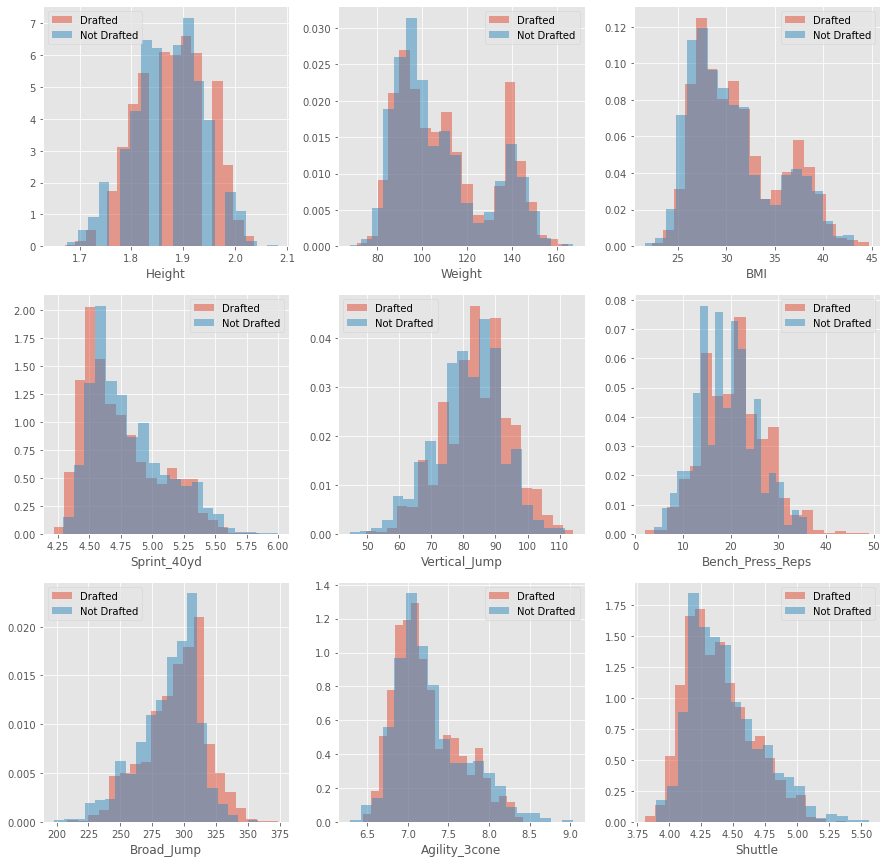

In [467]:
# Histograms of numerical data
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

cols = ['Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    r = i//3
    c = i%3
    
    ax[r,c].hist(df_combine[df_combine['Drafted']==1][col],bins=20,alpha=0.5,density=True,label='Drafted')
    ax[r,c].hist(df_combine[df_combine['Drafted']==0][col],bins=20,alpha=0.5,density=True,label='Not Drafted')
    ax[r,c].set_xlabel(col)
    ax[r,c].legend()

The distributions above show some very subtle differences, but it can be hard to see. Part of the reason for this might be that all the different positions are being mixed together. It might be easier to see differences if we separate the players by position.

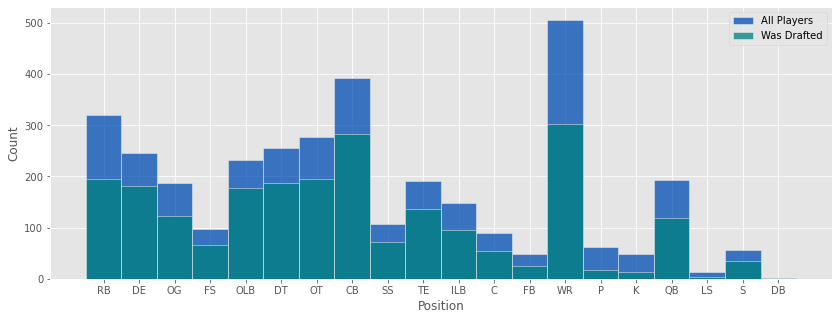

In [468]:
fig, ax = plt.subplots(figsize=(14,5))

sns.histplot(data=df_combine, x='Position', ax=ax, color=(0.0,0.3,0.7,1.0), label='All Players')
sns.histplot(data=df_combine[df_combine['Drafted']==1], x='Position', ax=ax, color=(0.0,0.5,0.5,0.5), label='Was Drafted')
ax.legend()

Below is a histogram of players by age. It appears that the youngest players (20 years old), get drafted at a very high rate.

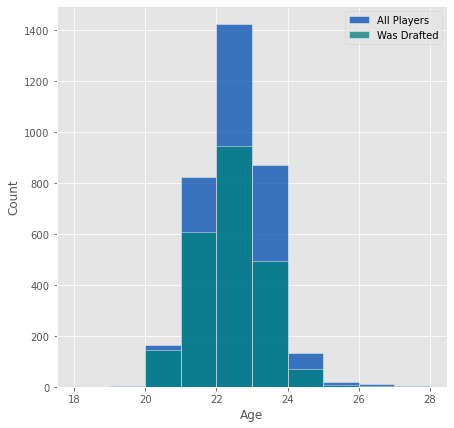

In [469]:
fig, ax = plt.subplots(figsize=(7,7))

sns.histplot(data=df_combine, x='Age', ax=ax, color=(0.0,0.3,0.7,1.0), binwidth=1, label='All Players')
sns.histplot(data=df_combine[df_combine['Drafted']==1], x='Age', ax=ax, color=(0.0,0.5,0.5,0.5), binwidth=1, label='Was Drafted')
ax.legend()

In [471]:
# Look at those with DB as the position
df_combine[df_combine['Position']=='DB']

Year              Player   Age    School  Height     Weight  \
2054  2018  Minkah Fitzpatrick  21.0   Alabama  1.8542  91.172066   
3279  2018       Quenton Meeks  21.0  Stanford  1.8796  92.986436   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
2054         4.46          83.82              14.0      307.34  ...   
3279          NaN          99.06              11.0      325.12  ...   

                          Drafted..tm.rnd.yr.        BMI Player_Type  \
2054  Miami Dolphins / 1st / 11th pick / 2018  26.518481     defense   
3279                                      NaN  26.320172     defense   

       Position_Type Position Drafted player_code  pro_bowls  \
2054  defensive_back       DB       1    FitzMi00          3   
3279  defensive_back       DB       0    MeekQu00          0   

     Missing_Athletic_Tests  school_group  
2054                      2             1  
3279                      1             1  

[2 rows x 22 columns]

There are only two players with positions listed as DB (defensive back). This is a more general term that encompasses safeties, free safeties, strong safeties, and cornerbacks. After looking these players up online, Minkah Fitzpatrick is considered to be a free safety and Quenton Meeks is considered to be a cornerback. Let's fix those below.

In [472]:
df_combine.at[2054,'Position'] = 'FS'
df_combine.at[3279,'Position'] = 'CB'

Below, I plot split violin plots for each numerical column separated by position. The violins are split so that the distribution of undrafted players is on the left and the distribution of drafted players is on the right. I also obtain the p-value for a Kolmogorov-Smirnov test to help determine which distributions are different.

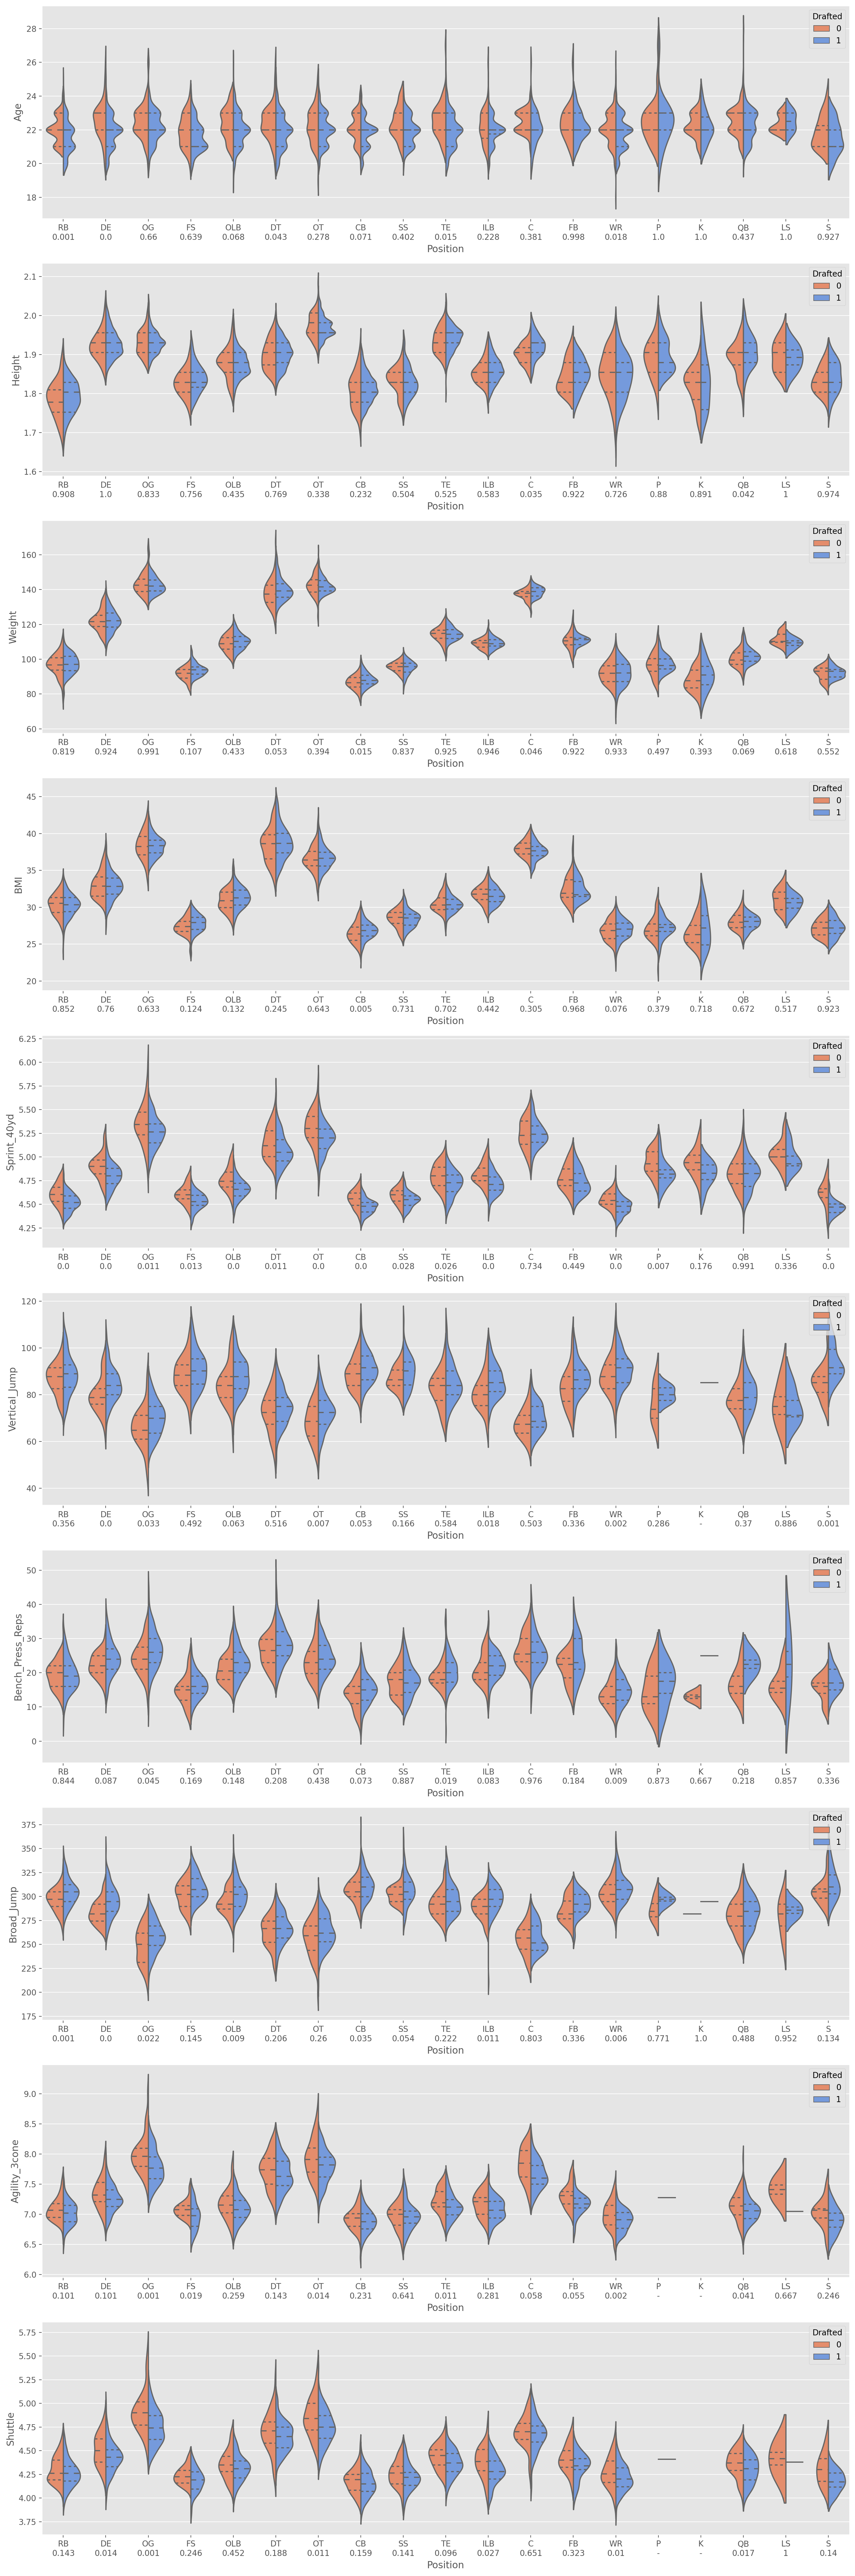

In [473]:
# Violin plots for each athletic test and each position
fig, ax = plt.subplots(nrows=10, figsize=(15,45), dpi=200)
plt.style.use('ggplot')

cols = ['Age','Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    sns.violinplot(data=df_combine, x='Position', y=col, hue='Drafted', split=True, inner='quartile',
                   palette=['#f88458', '#6495ed'], ax=ax[i])
    ks_results = []
    for j, pos in enumerate(df_combine['Position'].unique()):
        try:
            ks_result = st.ks_2samp(df_combine[(df_combine['Drafted']==1) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col],
                                    df_combine[(df_combine['Drafted']==0) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col])
            ks_results.append(ks_result[1])
        except:
            ks_results.append("-")
    ax[i].set_xticklabels([f"{pos}\n{ks}" if ks=="-" else f"{pos}\n{round(ks,3)}" for pos, ks in zip(df_combine['Position'].unique(),ks_results)])
            
fig.tight_layout()

First, plotting the distributions for each position separately shows the drastic differences in performance on certain tests.
The classifiers will be much more accurate if the positions are taken into account.<br>

Second, there are visible differences between the drafted and undrafted players in many cases. For example, for positions where speed is considered important (wide receiver, running back, safety, cornerback), the drafted players ran the 40-yard sprint about a tenth of a second faster, a significant difference given the spread in the values is on the order of a tenth of a second.<br>

KS tests:<br>
Height: The only positions for which the KS-test p-value was below 0.05 were center (C) and quarterback (QB). In both cases, taller players were more likely to get drafted.<br>

Weight: Significant p-values are seen for defensive tackles (DT), cornerbacks (CB), and centers (C). In all three cases, heavier players were more likely to get drafted.<br>

BMI: The only position with a significant p-value is cornerbacks (CB). Larger BMIs were more likely to be drafted.<br>

Sprint_40yd: Now we are talking. Most players do the 40-yard sprint, regardless of position. The only positions that do NOT have significant p-values from the KS-test centers (C), fullbacks (FB), kickers (K), quarterbacks (QB), and long snappers (LS). These are mostly not a surprise as most of these positions do not put great emphasis on speed (I guess the age of the running quarterback is over).

Vertical_Jump: Significant KS-test results: defensive ends (DE), offensive guards (OG), outside linebackers (OLB), offensive tackle (OT), inside linebackers (ILB), wide receivers (WR), and safeties (S). In every case, players with larger vertical jumps had a better chance of being drafted.<br>

Bench_Press_Reps: Significant KS-test results: offensive guards (OG), tight ends (TE), and wide receivers (WR). More reps (stronger) means a better chance of being drafted.

Broad_Jump: Significant KS-test results: running backs (RB), defensive ends (DE), offensive guards (OG), outside linebackers (OLB), cornerbacks (CB), inside linebackers (ILB), wide receivers (WR), safeties (S). Larger broad jumps lead to a better chance of being drafted.

Agility_3cone: Significant KS-test results: offensive guards (OG), free safeties (FS), offensive tackles (OT), tight ends (TE), and wide receivers (WR). Several other positions had low, but not significant p-values. Faster times lead to higher chances of being drafted.

Shuttle: Significant KS-test results: defensive ends (DE), offensive guards (OG), offensive tackles (OT), inside linebackers (ILB), wide receivers (WR), and quarterbacks (QB). Faster shuttle times lead to higher chances of being drafted.

There weren't any columns that led to a significant p-value for kickers, punters, or long snappers. This is not particularly surprising; those positions have a very specific set of skills needed that are not really tested by the drills at the combine. Fullbacks also didn't have any p-values below 0.05. This is probably just because of small sample sizes (who still uses fullbacks?)

The plots and KS tests indicate that the results of the combine are going to have predictive power when trying to tell who will get drafted.

### Missing Values

For certain classifiers, it is important to fill missing values. As discussed before, it would not make much sense to just take the mean or median of a given column since different football positions have such different peformance on the drills. Instead, I should impute using just players of the same position.<br>

Below, I wrote a function for imputing missing values for each separate position. The function is also able to standardize the data, again treating each position separately. Some classifiers need different columns to have similar scales while others do not, hence why I made standardizing optional.

I wrote a function to do this because I eventually want to use GridSearchCV to tune hyperparameters and I need a pipeline that will process and fit the data so there is no data leakage. I do not actually think the data leakage would be significant here; the leakage would be caused by taking means of both training and validation data together when imputing rather than separately, but these means should be very close anyway. It is just good practice to write a custom function for my pipeline.

In [474]:
def ImputeAndScaleByPosition(X, standardize=True):
    """
    This function is a custom imputer and standard scaler that handles each
    football position separately.
    
    Input: 
    X: pandas DataFrame
    It can't just be a numpy array because the column names are needed
    
    standardize: True if data should be transformed to standard scale (default)
    
    Output: pandas DataFrame of transformed data
    Even columns that were not transformed are passed through the function
    """
    # Columns where position IS NOT taken into account
    cols1 = []
    
    # Columns where position IS taken into account
    cols2 = ['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']

    Xcopy = X.copy()

    for col in cols1:
        Xcopy.loc[Xcopy[col].isna()==True,col] = X.loc[X[col].isna()==False,col].mean()
        
        if standardize:
            Xcopy[col] -= X.loc[X[col].isna()==False,col].mean()
            Xcopy[col] /= X.loc[X[col].isna()==False,col].std()

    for col in cols2:
        for pos in Xcopy['Position'].unique():
            if sum((X[col].isna()==False) & (X['Position']==pos)) > 2:
                # Impute mean
                Xcopy.loc[(Xcopy[col].isna()==True) & (Xcopy['Position']==pos),col] = \
                X.loc[(X[col].isna()==False) & (X['Position']==pos),col].mean()
                
                if standardize:
                    # Subtract mean
                    Xcopy.loc[Xcopy['Position']==pos,col] -= X.loc[(X[col].isna()==False) & (X['Position']==pos),col].mean()
                    # Divide by standard deviation
                    Xcopy.loc[Xcopy['Position']==pos,col] /= X.loc[(X[col].isna()==False) & (X['Position']==pos),col].std()
                    
            # Depending on the split, there might not have been any data to make a mean or std from.
            # Just use whole dataset in this case.
            else:
                # Impute mean
                Xcopy.loc[(Xcopy[col].isna()==True) & (Xcopy['Position']==pos),col] = \
                X.loc[X[col].isna()==False,col].mean()
                
                if standardize:
                    # Subtract mean
                    Xcopy.loc[Xcopy['Position']==pos,col] -= X.loc[X[col].isna()==False,col].mean()
                    # Divide by standard deviation
                    Xcopy.loc[Xcopy['Position']==pos,col] /= X.loc[X[col].isna()==False,col].std()

    return Xcopy

In [475]:
# Try out function
df_fill = ImputeAndScaleByPosition(df_combine)
df_fill

Year            Player       Age            School    Height    Weight  \
0     2009      Beanie Wells -1.862225          Ohio St.  1.462241  1.589628   
1     2009        Will Davis -0.035963          Illinois -1.349221 -0.601748   
2     2009    Herman Johnson  1.733906               LSU  2.500889  3.992144   
3     2009    Rashad Johnson  1.433782           Alabama -0.891864 -0.275926   
4     2009        Cody Brown -0.090699       Connecticut  0.076839  0.164948   
...    ...               ...       ...               ...       ...       ...   
3472  2019   Xavier Crawford  1.270498  Central Michigan -0.217565 -0.730062   
3473  2019      Jordan Brown  0.128510  South Dakota St.  0.417402  0.836873   
3474  2019  Corey Ballentine  0.128510          Washburn -0.217565  0.277253   
3475  2019         Ugo Amadi -0.677275            Oregon -2.342743 -0.511219   
3476  2019    Nasir Adderley -0.677275          Delaware -0.271265  0.403840   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
0       -1.585033      -0.349712          1.239326    1.722030  ...   
1        0.112043       0.078459          0.705919   -0.006282  ...   
2        1.127480       0.000000         -0.892265    0.000000  ...   
3       -0.720185       0.509781         -0.233639   -0.128689  ...   
4        0.628026       0.656356          0.712297    0.292234  ...   
...           ...            ...               ...         ...  ...   
3472    -0.195690       0.639774         -0.839942    0.000000  ...   
3473     0.135567       1.371909         -0.369279    1.066803  ...   
3474    -0.306109       1.371909          0.101385    2.327469  ...   
3475    -0.192050      -0.950479          0.329426   -1.154620  ...   
3476     0.000000       0.000000          0.000000    0.000000  ...   

                                Drafted..tm.rnd.yr.       BMI Player_Type  \
0        Arizona Cardinals / 1st / 31st pick / 2009  0.468497     offense   
1       Arizona Cardinals / 6th / 204th pick / 2009  0.343207     defense   
2       Arizona Cardinals / 5th / 167th pick / 2009  1.681662     offense   
3        Arizona Cardinals / 3rd / 95th pick / 2009  0.555367     defense   
4        Arizona Cardinals / 2nd / 63rd pick / 2009  0.076487     defense   
...                                             ...       ...         ...   
3472       Houston Texans / 6th / 195th pick / 2019 -0.536726     defense   
3473                                            NaN  0.415834     defense   
3474      New York Giants / 6th / 180th pick / 2019  0.477182     defense   
3475     Seattle Seahawks / 4th / 132nd pick / 2019  1.738474     defense   
3476  Los Angeles Chargers / 2nd / 60th pick / 2019  0.565217     defense   

          Position_Type Position Drafted player_code  pro_bowls  \
0       backs_receivers       RB       1    WellCh00          0   
1     defensive_lineman       DE       1    DaviWi99          0   
2     offensive_lineman       OG       1    JohnHe23          0   
3        defensive_back       FS       1    JohnRa98          0   
4           line_backer      OLB       1    BrowCo96          0   
...                 ...      ...     ...         ...        ...   
3472     defensive_back       CB       1    CrawXa00          0   
3473     defensive_back       CB       0        None          0   
3474     defensive_back       CB       1    BallCo00          0   
3475     defensive_back        S       1    AmadUg00          0   
3476     defensive_back        S       1    AddeNa00          0   

     Missing_Athletic_Tests  school_group  
0                         2             1  
1                         0             2  
2                         4             1  
3                         0             1  
4                         0             2  
...                     ...           ...  
3472                      3             3  
3473                      2             3  
3474                      0             3  
3475                  

After running the function, any player that did not complete a test at the Combine should now have a 0.0 in its place (to indicate a z-score of 0) if standardize was left as True. If standardize was set to False, then each missing test should be equal to the mean for all of the players of the same position.

In [476]:
df_fill.describe()

Year           Age        Height        Weight   Sprint_40yd  \
count  3477.000000  3.477000e+03  3.477000e+03  3.477000e+03  3.477000e+03   
mean   2013.823699 -1.185260e-16  1.109648e-15 -7.315913e-16 -2.321474e-15   
std       3.075616  9.922020e-01  9.974075e-01  9.974075e-01  9.719898e-01   
min    2009.000000 -3.993793e+00 -4.157774e+00 -3.720115e+00 -2.937202e+00   
25%    2011.000000 -7.985759e-01 -6.362299e-01 -6.384226e-01 -6.373652e-01   
50%    2014.000000 -3.596327e-02  6.251143e-02 -3.246668e-02  0.000000e+00   
75%    2016.000000  7.382080e-01  6.399980e-01  6.330465e-01  5.822508e-01   
max    2019.000000  5.863604e+00  3.851072e+00  4.043403e+00  3.838330e+00   

       Vertical_Jump  Bench_Press_Reps   Broad_Jump  Agility_3cone  \
count    3477.000000      3.477000e+03  3477.000000    3477.000000   
mean        0.000046     -6.539364e-17    -0.000080       0.000030   
std         0.891241      8.570093e-01     0.886087       0.803117   
min        -2.997623     -3.960804e+00    -5.621044      -3.287061   
25%        -0.512833     -4.513003e-01    -0.483211      -0.315401   
50%         0.000000      0.000000e+00     0.000000       0.000000   
75%         0.465892      3.504919e-01     0.426687       0.255509   
max         3.600756      3.913570e+00     4.488612       3.887483   

           Shuttle           BMI      Drafted    pro_bowls  \
count  3477.000000  3.477000e+03  3477.000000  3477.000000   
mean      0.000007 -5.844556e-16     0.656888     0.238712   
std       0.816790  9.974075e-01     0.474817     0.949815   
min      -3.188800 -4.171374e+00     0.000000     0.000000   
25%      -0.334125 -6.623277e-01     0.000000     0.000000   
50%       0.000000 -1.123837e-02     1.000000     0.000000   
75%       0.293630  6.400673e-01     1.000000     0.000000   
max       3.621466  3.606204e+00     1.000000    10.000000   

       Missing_Athletic_Tests  school_group  
count             3477.000000   3477.000000  
mean                 1.398044      1.922059  
std                  1.809951      0.828831  
min                  0.000000      1.000000  
25%                  0.000000      1.000000  
50%                  1.000000      2.000000  
75%                  2.000000      3.000000  
max                  6.000000      3.000000

Below, we can see that out of 48 kickers, none did the Agility_3cone or Shuttle drills, and 3 or fewer did Vertical_Jump, Bench_Press_Reps, and Broad_Jump. A similar story is seen with punters. I am going to cut both from the dataset because both positions put great emphasis on a specific skill (kicking) and that skill is not captured in the Combine.

There will still be 3366 players in the dataset.

In [477]:
df_combine[df_combine['Position']=='K'].describe()

Year        Age     Height      Weight  Sprint_40yd  \
count    48.00000  47.000000  48.000000   48.000000    35.000000   
mean   2013.87500  22.234043   1.822979   88.979703     4.910000   
std       3.07789   0.757937   0.051933    7.379699     0.146348   
min    2009.00000  21.000000   1.727200   74.389149     4.570000   
25%    2011.00000  22.000000   1.778000   83.914588     4.805000   
50%    2014.00000  22.000000   1.828800   87.770124     4.930000   
75%    2016.00000  23.000000   1.854200   94.460611     4.960000   
max    2019.00000  24.000000   1.955800  107.047799     5.250000   

       Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  Shuttle  \
count           1.00               3.0    2.000000            0.0      0.0   
mean           85.09              17.0  288.290000            NaN      NaN   
std              NaN               7.0    8.980256            NaN      NaN   
min            85.09              12.0  281.940000            NaN      NaN   
25%            85.09              13.0  285.115000            NaN      NaN   
50%            85.09              14.0  288.290000            NaN      NaN   
75%            85.09              19.5  291.465000            NaN      NaN   
max            85.09              25.0  294.640000            NaN      NaN   

             BMI    Drafted  pro_bowls  Missing_Athletic_Tests  school_group  
count  48.000000  48.000000  48.000000               48.000000     48.000000  
mean   26.782084   0.291667   0.125000                5.145833      1.770833  
std     2.049076   0.459340   0.334219                0.618495      0.805291  
min    23.352095   0.000000   0.000000                3.000000      1.000000  
25%    25.219195   0.000000   0.000000                5.000000      1.000000  
50%    26.355920   0.000000   0.000000                5.000000      2.000000  
75%    27.896846   1.000000   0.000000                5.250000      2.000000  
max    31.464534   1.000000   1.000000                6.000000      3.000000

In [478]:
# Cut kickers and punters
df_combine.drop(df_combine[df_combine['Position'].isin(['K','P'])].index, inplace=True)
df_combine

Year            Player   Age            School  Height      Weight  \
0     2009      Beanie Wells  20.0          Ohio St.  1.8542  106.594207   
1     2009        Will Davis  22.0          Illinois  1.8796  118.387609   
2     2009    Herman Johnson  24.0               LSU  2.0066  165.107623   
3     2009    Rashad Johnson  23.0           Alabama  1.8034   92.079251   
4     2009        Cody Brown  22.0       Connecticut  1.8796  110.676538   
...    ...               ...   ...               ...     ...         ...   
3472  2019   Xavier Crawford  23.0  Central Michigan  1.8034   84.821773   
3473  2019      Jordan Brown  22.0  South Dakota St.  1.8288   91.172066   
3474  2019  Corey Ballentine  22.0          Washburn  1.8034   88.904105   
3475  2019         Ugo Amadi  21.0            Oregon  1.7526   90.264882   
3476  2019    Nasir Adderley  21.0          Delaware  1.8288   93.440028   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
0            4.38          85.09              25.0      325.12  ...   
1            4.84          83.82              27.0      292.10  ...   
2            5.50            NaN              21.0         NaN  ...   
3            4.49          93.98              15.0      304.80  ...   
4            4.76          92.71              26.0      304.80  ...   
...           ...            ...               ...         ...  ...   
3472         4.48          95.25              11.0         NaN  ...   
3473         4.51         100.33              13.0      325.12  ...   
3474         4.47         100.33              15.0      342.90  ...   
3475         4.51          82.55              18.0      292.10  ...   
3476          NaN            NaN               NaN         NaN  ...   

                                Drafted..tm.rnd.yr.        BMI Player_Type  \
0        Arizona Cardinals / 1st / 31st pick / 2009  31.004194     offense   
1       Arizona Cardinals / 6th / 204th pick / 2009  33.510073     defense   
2       Arizona Cardinals / 5th / 167th pick / 2009  41.005821     offense   
3        Arizona Cardinals / 3rd / 95th pick / 2009  28.312463     defense   
4        Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425     defense   
...                                             ...        ...         ...   
3472       Houston Texans / 6th / 195th pick / 2019  26.080939     defense   
3473                                            NaN  27.260221     defense   
3474      New York Giants / 6th / 180th pick / 2019  27.336171     defense   
3475     Seattle Seahawks / 4th / 132nd pick / 2019  29.386861     defense   
3476  Los Angeles Chargers / 2nd / 60th pick / 2019  27.938336     defense   

          Position_Type Position Drafted player_code  pro_bowls  \
0       backs_receivers       RB       1    WellCh00          0   
1     defensive_lineman       DE       1    DaviWi99          0   
2     offensive_lineman       OG       1    JohnHe23          0   
3        defensive_back       FS       1    JohnRa98          0   
4           line_backer      OLB       1    BrowCo96          0   
...                 ...      ...     ...         ...        ...   
3472     defensive_back       CB       1    CrawXa00          0   
3473     defensive_back       CB       0        None          0   
3474     defensive_back       CB       1    BallCo00          0   
3475     defensive_back        S       1    AmadUg00          0   
3476     defensive_back        S       1    AddeNa00          0   

     Missing_Athletic_Tests  school_group  
0                         2             1  
1                         0             2  
2                         4             1  
3                         0             1  
4                         0             2  
...                     ...           ...  
3472                      3             3  
3473                      2             3  
3474                      0             3  
3475                      0             1  
3476          

### Baseline Models

Below, I process the data and use different types of classifiers with their default hyperparameters.

In [479]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [480]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test = pd.get_dummies(X_test, columns=['Position','school_group'])

**Logistic Regression**

In [481]:
# Instantiate LogisticRegressionModel
logreg = LogisticRegression(C=1e12, random_state=42, solver='liblinear')

# Fit model
logreg.fit(X_train, y_train)

# Get predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46       826
           1       0.74      0.90      0.81      1698

    accuracy                           0.72      2524
   macro avg       0.69      0.63      0.64      2524
weighted avg       0.71      0.72      0.70      2524

              precision    recall  f1-score   support

           0       0.64      0.36      0.46       288
           1       0.73      0.90      0.80       554

    accuracy                           0.71       842
   macro avg       0.69      0.63      0.63       842
weighted avg       0.70      0.71      0.69       842



**Decision Tree Classifier**

In [482]:
# Instantiate DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit model
dtc.fit(X_train, y_train)

# Get predictions
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00      1698

    accuracy                           1.00      2524
   macro avg       1.00      1.00      1.00      2524
weighted avg       1.00      1.00      1.00      2524

              precision    recall  f1-score   support

           0       0.44      0.43      0.43       288
           1       0.71      0.71      0.71       554

    accuracy                           0.62       842
   macro avg       0.57      0.57      0.57       842
weighted avg       0.61      0.62      0.61       842



**K Nearest Neighbors**

In [483]:
# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit model
knn.fit(X_train, y_train)

# Get predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60       826
           1       0.79      0.91      0.84      1698

    accuracy                           0.78      2524
   macro avg       0.76      0.71      0.72      2524
weighted avg       0.77      0.78      0.76      2524

              precision    recall  f1-score   support

           0       0.50      0.33      0.39       288
           1       0.70      0.83      0.76       554

    accuracy                           0.66       842
   macro avg       0.60      0.58      0.58       842
weighted avg       0.63      0.66      0.64       842



**Random Forest Classifier**

In [484]:
# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Fit model
rfc.fit(X_train, y_train)

# Get predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00      1698

    accuracy                           1.00      2524
   macro avg       1.00      1.00      1.00      2524
weighted avg       1.00      1.00      1.00      2524

              precision    recall  f1-score   support

           0       0.58      0.33      0.42       288
           1       0.72      0.88      0.79       554

    accuracy                           0.69       842
   macro avg       0.65      0.60      0.60       842
weighted avg       0.67      0.69      0.66       842



**XGBoost**

In [485]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit model
xgb.fit(X_train, y_train)

# Get predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       826
           1       0.98      1.00      0.99      1698

    accuracy                           0.99      2524
   macro avg       0.99      0.98      0.99      2524
weighted avg       0.99      0.99      0.99      2524

              precision    recall  f1-score   support

           0       0.55      0.43      0.48       288
           1       0.73      0.82      0.77       554

    accuracy                           0.69       842
   macro avg       0.64      0.62      0.63       842
weighted avg       0.67      0.69      0.67       842



In [350]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3,4,5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [50, 75],
    'scale_pos_weight':[0.5, 0.75, 1]
}

In [351]:
xgb_gridcv = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)

xgb_gridcv.fit(X_train, y_train)

best_parameters = xgb_gridcv.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
    
y_train_pred = xgb_gridcv.predict(X_train)
y_test_pred = xgb_gridcv.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 3
min_child_weight: 2
n_estimators: 50
scale_pos_weight: 1
subsample: 0.5
              precision    recall  f1-score   support

           0       0.92      0.53      0.67       847
           1       0.80      0.98      0.88      1677

    accuracy                           0.83      2524
   macro avg       0.86      0.75      0.78      2524
weighted avg       0.84      0.83      0.81      2524

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       297
           1       0.79      0.97      0.87       545

    accuracy                           0.81       842
   macro avg       0.85      0.75      0.77       842
weighted avg       0.83      0.81      0.80       842



In [486]:
from sklearn.pipeline import Pipeline

In [492]:
# XGBClassifier pipeline
xgb = XGBClassifier(learning_rate=0.1,
                    max_depth=3,
                    min_child_weight=2,
                    n_estimators=50,
                    scale_pos_weight=1,
                    subsample=0.5,
                    booster='gbtree')

pipe = Pipeline(steps=[
    ('impute_scale',FunctionTransformer(ImputeAndScaleByPosition)),
    ('dummies',FunctionTransformer(pd.get_dummies,kw_args={'columns':['Position','school_group']})),
    ('xgb',xgb)
])

df_test = df_combine[df_combine['Age'].isna()==False]

X = df_test[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_test['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.25)

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55       815
           1       0.77      0.92      0.84      1687

    accuracy                           0.76      2502
   macro avg       0.75      0.68      0.69      2502
weighted avg       0.76      0.76      0.75      2502

              precision    recall  f1-score   support

           0       0.59      0.31      0.41       280
           1       0.72      0.89      0.80       555

    accuracy                           0.70       835
   macro avg       0.65      0.60      0.60       835
weighted avg       0.68      0.70      0.67       835



In [488]:
xgb.feature_importances_

array([0.07522838, 0.03672351, 0.05966902, 0.11116524, 0.04670209,
       0.0509274 , 0.04067383, 0.0629622 , 0.03953547, 0.04287845,
       0.        , 0.06114518, 0.        , 0.02126634, 0.04665513,
       0.        , 0.        , 0.        , 0.        , 0.05341676,
       0.        , 0.05530919, 0.        , 0.        , 0.        ,
       0.        , 0.06436897, 0.04163695, 0.0448288 , 0.0449071 ],
      dtype=float32)

In [489]:
# XGBClassifier pipeline with GridSearchCV
xgb = XGBClassifier()

param_grid_xgb = {
    'xgb__learning_rate': [0.1, 0.2],
    'xgb__max_depth': [3,4],
    'xgb__min_child_weight': [1, 2, 3],
    'xgb__subsample': [0.5, 0.7],
    'xgb__n_estimators': [50, 75],
    'xgb__scale_pos_weight':[0.5, 0.75, 1]
}

pipe = Pipeline(steps=[
    ('impute_scale',FunctionTransformer(ImputeAndScaleByPosition)),
    ('dummies',FunctionTransformer(pd.get_dummies,kw_args={'columns':['Position','school_group']})),
    ('xgb',xgb)
])

xgb_gridcv = GridSearchCV(pipe, param_grid=param_grid_xgb, cv=3)

X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

xgb_gridcv.fit(X_train, y_train)

best_parameters = xgb_gridcv.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_train_pred = xgb_gridcv.predict(X_train)
y_test_pred = xgb_gridcv.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.2
xgb__max_depth: 3
xgb__min_child_weight: 2
xgb__n_estimators: 50
xgb__scale_pos_weight: 1
xgb__subsample: 0.7
              precision    recall  f1-score   support

           0       0.77      0.50      0.61       826
           1       0.79      0.93      0.86      1698

    accuracy                           0.79      2524
   macro avg       0.78      0.71      0.73      2524
weighted avg       0.79      0.79      0.77      2524

              precision    recall  f1-score   support

           0       0.60      0.40      0.48       288
           1       0.73      0.86      0.79       554

    accuracy                           0.70       842
   macro avg       0.67      0.63      0.64       842
weighted avg       0.69      0.70      0.69       842



In [428]:
print(np.sum(y_test),np.sum(y_test_pred))

551 686


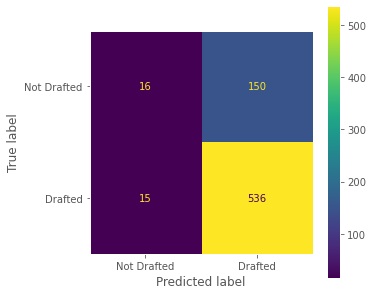

In [427]:
cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

I tested fitting the different classifiers for different train-test splits and there is a pretty big difference between them.
In one, my optimal XGBoost model had 76% accuracy, 64% and 86% recall. In another, those numbers were 81%, 53%, and 97%, respectively. Those tell somewhat different stories.

# Old Cells

In [285]:
# Make copy of DataFrame
df_fill = df_combine.copy()

# Impute values for each position and drill
drill_cols = ['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
              'Shuttle','BMI']

# The code below imputes averages, shifts averages to 0, and standardizes
for i, col in enumerate(drill_cols):
    for j, pos in enumerate(df_fill['Position'].unique()):
        df_fill.loc[(df_fill['Position']==pos) & (df_fill[col].isna()==True),col] = df_combine[df_combine['Position']==pos][col].mean()
        df_fill.loc[df_fill['Position']==pos,col] -= df_combine[df_combine['Position']==pos][col].mean()
        df_fill.loc[df_fill['Position']==pos,col] /= df_combine[df_combine['Position']==pos][col].std()
        
df_fill[df_fill['Missing_Athletic_Tests']==6]

Year                 Player       Age             School    Height  \
1179  2014               Dee Ford  0.009391             Auburn -1.349221   
1188  2014      Jeremiah Attaochu -1.048839       Georgia Tech  0.789909   
1290  2014      Zach Mettenberger -0.372210                LSU  1.217484   
1309  2015       Breshad Perriman -0.880822    Central Florida  0.557690   
1643  2016           David Morgan -0.036063  Texas-San Antonio -0.257308   
1774  2017       Roderick Johnson -1.114252        Florida St.  1.231338   
1784  2017              Jake Butt -1.045828           Michigan  0.522785   
1789  2017    Jalen Reeves-Maybin -0.065261          Tennessee -1.349299   
1791  2017             Brad Kaaya -1.386163         Miami (FL)  0.639998   
1793  2017           Jarrad Davis -1.208861            Florida -0.162790   
1811  2017           Malik Hooker -1.850122           Ohio St.  0.543819   
1818  2017         Dede Westbrook  1.166364           Oklahoma -0.307927   
1878  2017            Marcus Maye  1.456479            Florida -0.174022   
1881  2017         Treyvon Hester  2.010174             Toledo -0.609555   
1905  2017          Reuben Foster  0.028333            Alabama -0.965888   
1930  2017            Corey Davis  0.142771     West. Michigan  0.990499   
1956  2018          Lamar Jackson -1.386163         Louisville -0.514975   
1985  2018            Billy Price  0.837584           Ohio St.  0.567958   
2015  2018            Nick Bawden -1.308722      San Diego St.  0.841698   
2023  2018           Jordan Akins  2.993231    Central Florida -1.037401   
2026  2018           Duke Ejiofor  0.009391        Wake Forest  0.081418   
2066  2018            Isaiah Wynn -1.349322            Georgia -0.887703   
2075  2018           Kamrin Moore -0.964857        Boston Col. -0.217565   
2078  2018          R.J. McIntosh -0.951954         Miami (FL)  0.797110   
2101  2018           Dante Pettis  0.142771         Washington -0.307927   
2130  2019       Deionte Thompson  0.451965            Alabama  0.419228   
2131  2019           Kyler Murray -1.386163           Oklahoma -2.824921   
2136  2019      Kendall Sheffield  0.172296           Ohio St. -0.217565   
2141  2019         Marquise Brown -0.880822           Oklahoma -1.606353   
2225  2019            Josh Jacobs -0.761920            Alabama -0.262269   
2227  2019        Clayton Thorson  0.641742       Northwestern  0.639998   
2230  2019  J.J. Arcega-Whiteside  0.142771           Stanford  0.557690   
2246  2019           Mike Edwards  0.451965           Kentucky -1.652250   
3174  2017           Seth Russell  0.641742             Baylor  0.062511   
3249  2017          Keionta Davis  0.000000   Tenn-Chattanooga -0.633901   
3277  2018           Cam Phillips  0.142771      Virginia Tech -0.307927   
3299  2018        Deontay Burnett -1.904415                USC -0.307927   
3300  2018           David Bright  0.000000           Stanford -0.515152   
3316  2018             Brett Toth  0.000000               Army  0.358093   
3351  2018          Maurice Hurst  0.000000           Michigan -0.609555   
3362  2018           Rashard Fant  0.000000            Indiana -0.852532   
3413  2019         Brandon Knight  0.000000            Indiana -1.388396   
3428  2019         Donnell Greene  0.000000          Minnesota -0.515152   
3436  2019            Greg Dortch  0.000000        Wake Forest -2.471970   
3445  2019            C.J. Conrad  0.000000           Kentucky -0.257308   
3476  2019         Nasir Adderley  0.000000           Delaware -0.271265   

        Weight  Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
1179 -1.255463          0.0            0.0               0.0         0.0  ...   
1188  0.949929          0.0            0.0               0.0         0.0  ...   
1290  0.064069          0.0            0.0               0.0         0.0  ...   
1309  0.640818          0.0            0.0               0.0         0.0  ...   
1643  1.115649          0.0 

In [286]:
df_fill = ImputeAndScaleByPosition(df_combine)
df_fill[df_fill['Missing_Athletic_Tests']==6]

Year                 Player       Age             School    Height  \
1179  2014               Dee Ford  0.026022             Auburn -1.349221   
1188  2014      Jeremiah Attaochu -1.009814       Georgia Tech  0.789909   
1290  2014      Zach Mettenberger  0.026022                LSU  1.217484   
1309  2015       Breshad Perriman -1.009814    Central Florida  0.557690   
1643  2016           David Morgan  0.026022  Texas-San Antonio -0.257308   
1774  2017       Roderick Johnson -1.009814        Florida St.  1.231338   
1784  2017              Jake Butt -1.009814           Michigan  0.522785   
1789  2017    Jalen Reeves-Maybin  0.026022          Tennessee -1.349299   
1791  2017             Brad Kaaya -1.009814         Miami (FL)  0.639998   
1793  2017           Jarrad Davis -1.009814            Florida -0.162790   
1811  2017           Malik Hooker -2.045650           Ohio St.  0.543819   
1818  2017         Dede Westbrook  1.061859           Oklahoma -0.307927   
1878  2017            Marcus Maye  1.061859            Florida -0.174022   
1881  2017         Treyvon Hester  2.097695             Toledo -0.609555   
1905  2017          Reuben Foster  0.026022            Alabama -0.965888   
1930  2017            Corey Davis  0.026022     West. Michigan  0.990499   
1956  2018          Lamar Jackson -1.009814         Louisville -0.514975   
1985  2018            Billy Price  1.061859           Ohio St.  0.567958   
2015  2018            Nick Bawden -1.009814      San Diego St.  0.841698   
2023  2018           Jordan Akins  3.133531    Central Florida -1.037401   
2026  2018           Duke Ejiofor  0.026022        Wake Forest  0.081418   
2066  2018            Isaiah Wynn -1.009814            Georgia -0.887703   
2075  2018           Kamrin Moore -1.009814        Boston Col. -0.217565   
2078  2018          R.J. McIntosh -1.009814         Miami (FL)  0.797110   
2101  2018           Dante Pettis  0.026022         Washington -0.307927   
2130  2019       Deionte Thompson  0.026022            Alabama  0.419228   
2131  2019           Kyler Murray -1.009814           Oklahoma -2.824921   
2136  2019      Kendall Sheffield  0.026022           Ohio St. -0.217565   
2141  2019         Marquise Brown -1.009814           Oklahoma -1.606353   
2225  2019            Josh Jacobs -1.009814            Alabama -0.262269   
2227  2019        Clayton Thorson  1.061859       Northwestern  0.639998   
2230  2019  J.J. Arcega-Whiteside  0.026022           Stanford  0.557690   
2246  2019           Mike Edwards  0.026022           Kentucky -1.652250   
3174  2017           Seth Russell  1.061859             Baylor  0.062511   
3249  2017          Keionta Davis  0.000000   Tenn-Chattanooga -0.633901   
3277  2018           Cam Phillips  0.026022      Virginia Tech -0.307927   
3299  2018        Deontay Burnett -2.045650                USC -0.307927   
3300  2018           David Bright  0.000000           Stanford -0.515152   
3316  2018             Brett Toth  0.000000               Army  0.358093   
3351  2018          Maurice Hurst  0.000000           Michigan -0.609555   
3362  2018           Rashard Fant  0.000000            Indiana -0.852532   
3413  2019         Brandon Knight  0.000000            Indiana -1.388396   
3428  2019         Donnell Greene  0.000000          Minnesota -0.515152   
3436  2019            Greg Dortch  0.000000        Wake Forest -2.471970   
3445  2019            C.J. Conrad  0.000000           Kentucky -0.257308   
3476  2019         Nasir Adderley  0.000000           Delaware -0.271265   

        Weight  Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
1179 -1.255463          0.0            0.0               0.0         0.0  ...   
1188  0.949929          0.0            0.0               0.0         0.0  ...   
1290  0.064069          0.0            0.0               0.0         0.0  ...   
1309  0.640818          0.0            0.0               0.0         0.0  ...   
1643  1.115649          0.0 

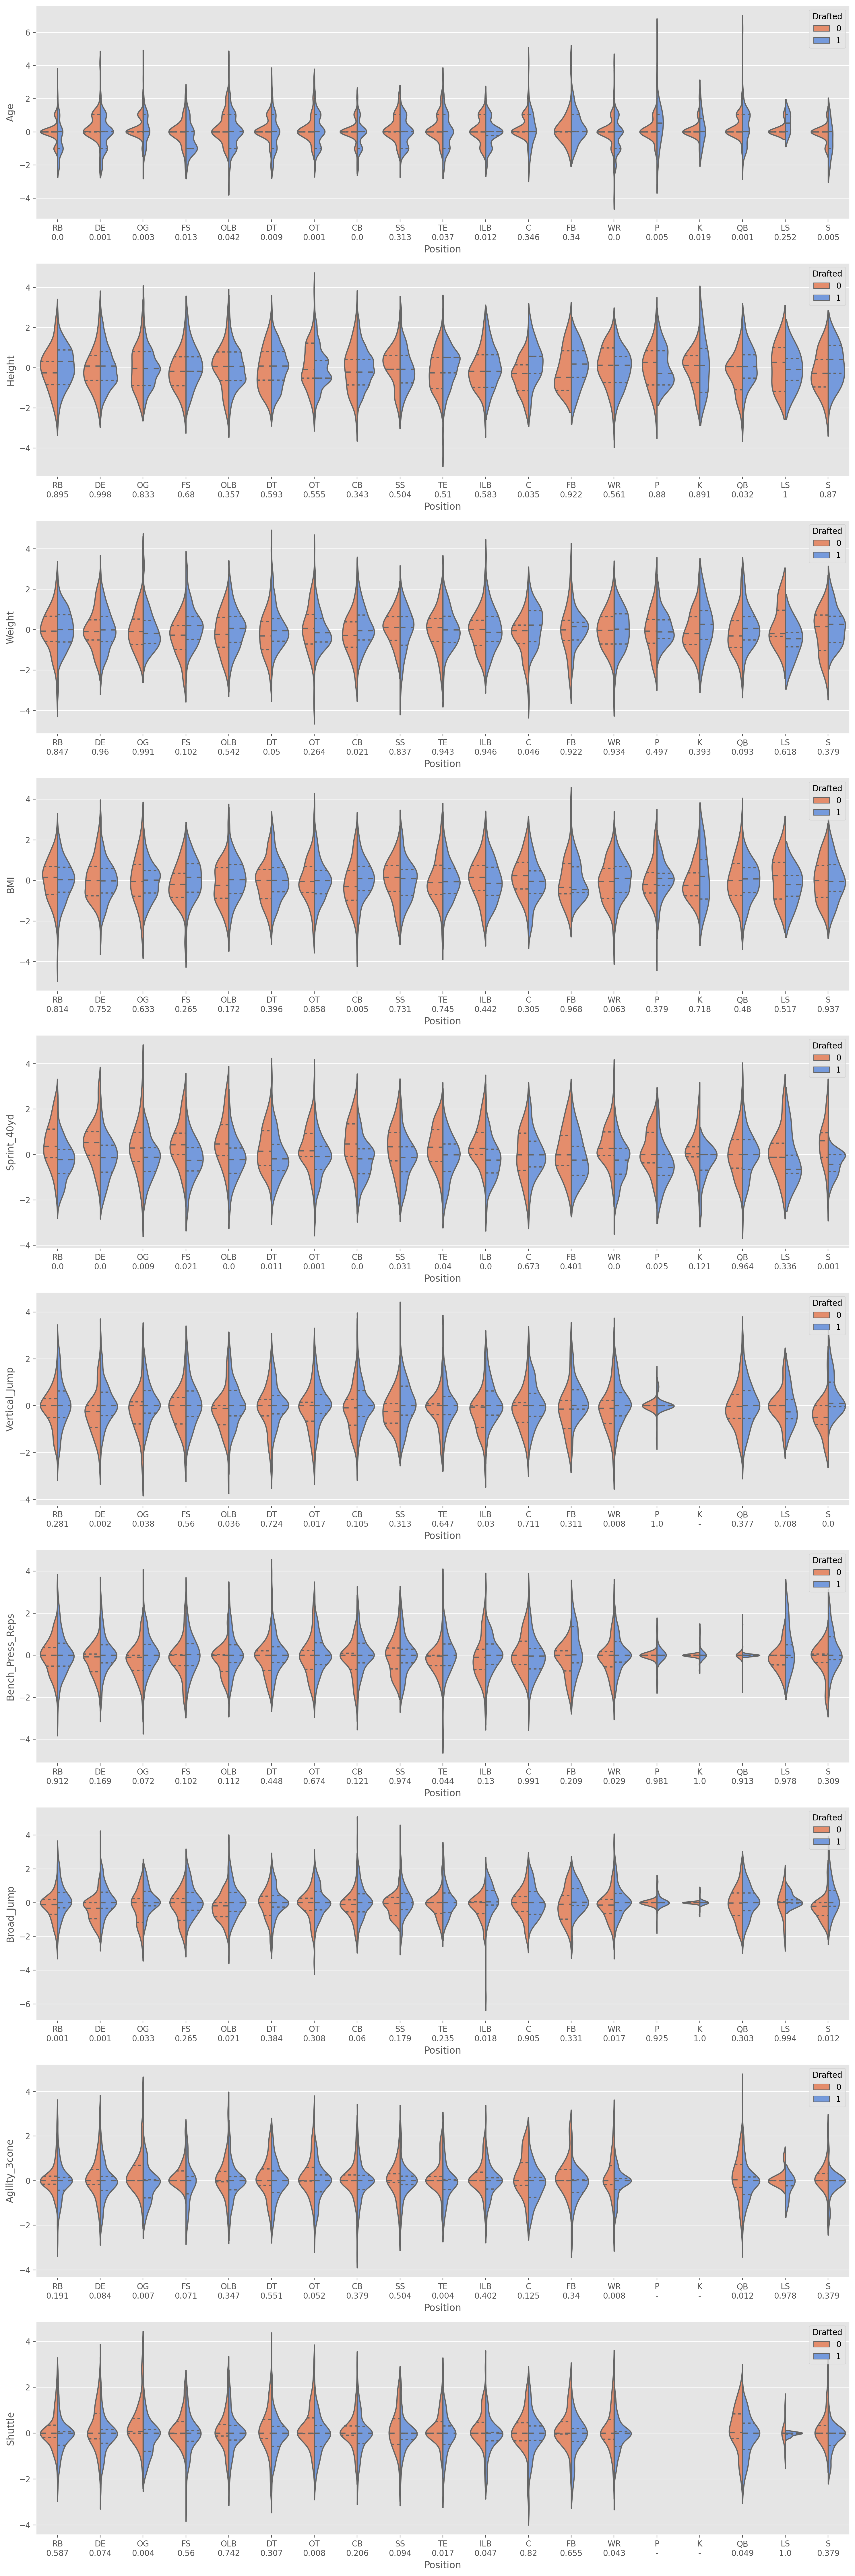

In [149]:
fig, ax = plt.subplots(nrows=10, figsize=(15,45), dpi=200)
plt.style.use('ggplot')

cols = ['Age','Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    sns.violinplot(data=df_fill, x='Position', y=col, hue='Drafted', split=True, inner='quartile',
                   palette=['#f88458', '#6495ed'], ax=ax[i])
    ks_results = []
    for j, pos in enumerate(df_fill['Position'].unique()):
        try:
            ks_result = st.ks_2samp(df_fill[(df_fill['Drafted']==1) &
                                               (df_fill[col].isna()==False) &
                                               (df_fill['Position']==pos)][col],
                                    df_fill[(df_fill['Drafted']==0) &
                                               (df_fill[col].isna()==False) &
                                               (df_fill['Position']==pos)][col])
            ks_results.append(ks_result[1])
        except:
            ks_results.append("-")
    ax[i].set_xticklabels([f"{pos}\n{ks}" if ks=="-" else f"{pos}\n{round(ks,3)}" for pos, ks in zip(df_fill['Position'].unique(),ks_results)])
            
fig.tight_layout()

### Logistic Regression

In [105]:
# Define X and y
X = df_fill[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_fill['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Apply get_dummies to separate categorical data into columns
X_train_ohe = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test_ohe = pd.get_dummies(X_test, columns=['Position','school_group'])

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ohe)
X_test_scaled = scaler.transform(X_test_ohe)

pd.DataFrame(X_train_scaled, columns=X_train_ohe.columns)

Age    Height    Weight  Sprint_40yd  Vertical_Jump  \
0     1.065652 -1.054434 -0.907334     0.972127       0.006973   
1     1.119250 -0.621444  1.764734     0.925394      -1.446393   
2    -1.399383 -1.163875 -0.753459     0.202278      -0.785327   
3    -0.829110 -0.851731 -0.667342    -0.045396      -0.201609   
4     1.065652  1.313980  0.329409     1.725116       0.006973   
...        ...       ...       ...          ...            ...   
2519  0.346706  0.311764  0.459621    -0.597683       0.710117   
2520  2.168004  1.313980 -0.007884    -1.211540       1.142907   
2521  0.012923  0.077836  0.349520     0.044037      -1.396320   
2522  1.119250  0.802132 -0.620807    -0.842180       0.006973   
2523  2.393427  0.121822  0.044356    -0.453055      -0.662650   

      Bench_Press_Reps  Broad_Jump  Agility_3cone   Shuttle       BMI  ...  \
0             2.094944    0.009388       2.864050  2.774540  0.064114  ...   
1            -0.171873   -2.102920       2.161759  2.791859  1.957897  ...   
2             0.197663   -1.142586       1.476538  1.969612  0.601758  ...   
3            -0.077960    0.696779      -1.627767 -1.763969 -0.014087  ...   
4            -4.557119    0.009388      -0.003236 -0.008947 -0.880892  ...   
...                ...         ...            ...       ...       ...  ...   
2519          0.012100   -0.543765      -1.692492 -0.834161  0.263161  ...   
2520         -0.831964    1.217418       0.844959  0.460308 -1.199061  ...   
2521         -0.157875   -0.349314       0.746222  1.509740  0.265607  ...   
2522          0.012100    0.009388      -0.003236 -0.008947 -1.044542  ...   
2523          0.201426   -0.145050      -0.407252  1.289131 -0.089123  ...   

      Position_OT  Position_QB  Position_RB  Position_S  Position_SS  \
0       -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
1       -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
2       -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
3       -0.300468    -0.249579     3.084910     -0.1285    -0.180923   
4       -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
...           ...          ...          ...         ...          ...   
2519    -0.300468    -0.249579     3.084910     -0.1285    -0.180923   
2520    -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
2521    -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
2522    -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   
2523    -0.300468    -0.249579    -0.324159     -0.1285    -0.180923   

      Position_TE  Position_WR  school_group_1  school_group_2  school_group_3  
0        4.158107    -0.430736       -0.770347         1.46531       -0.670007  
1       -0.240494    -0.430736       -0.770347         1.46531       -0.670007  
2       -0.240494    -0.430736        1.298116        -0.68245       -0.670007  
3       -0.240494    -0.430736       -0.770347        -0.68245        1.492522  
4        4.158107    -0.430736       -0.770347        -0.68245        1.492522  
...           ...          ...             ...             ...             ...  
2519    -0.240494    -0.430736        1.298116        -0.68245       -0.670007  
2520     4.158107    -0.430736       -0.770347        -0.68245        1.492522  
2521    -0.240494    -0.430736       -0.770347         1.46531       -0.670007  
2522    -0.240494    -0.430736        1.298116        -0.68245       -0.670007  
2523    -0.240494     2.321610       -0.770347         1.46531       -0.670007  

[2524 rows x 30 columns]

In [87]:
# Instantiate LogisticRegressionModel
logreg = LogisticRegression(C=1e12, random_state=42, solver='liblinear')

# Fit Logistic Model
logreg.fit(X_train_scaled, y_train)

y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.34      0.44       854
           1       0.73      0.89      0.80      1670

    accuracy                           0.70      2524
   macro avg       0.67      0.62      0.62      2524
weighted avg       0.69      0.70      0.68      2524

              precision    recall  f1-score   support

           0       0.66      0.32      0.43       290
           1       0.72      0.91      0.80       552

    accuracy                           0.71       842
   macro avg       0.69      0.62      0.62       842
weighted avg       0.70      0.71      0.68       842



In [88]:
# Instantiate DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit Logistic Model
dtc.fit(X_train_scaled, y_train)

y_train_pred = dtc.predict(X_train_scaled)
y_test_pred = dtc.predict(X_test_scaled)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      2524
   macro avg       1.00      1.00      1.00      2524
weighted avg       1.00      1.00      1.00      2524

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       290
           1       0.79      0.77      0.78       552

    accuracy                           0.71       842
   macro avg       0.69      0.69      0.69       842
weighted avg       0.72      0.71      0.72       842



In [89]:
param_grid_dtc = {'criterion':['gini','entropy'],
                 'max_depth': [3,4,5,6,7,None],
                 'min_samples_split':[2,4,8,None]}

In [109]:
dtc_gridcv = GridSearchCV(dtc, param_grid=param_grid_dtc,cv=3)

dtc_gridcv.fit(X_train_scaled, y_train)

y_train_pred = dtc_gridcv.predict(X_train_scaled)
y_test_pred = dtc_gridcv.predict(X_test_scaled)

print(dtc_gridcv.best_params_)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 234, in fit
    if not 0. < self.min_samples_split <= 1.:
TypeError: '<' not supported between instances of 'float' and 'NoneType'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Es

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 234, in fit
    if not 0. < self.min_samples_split <= 1.:
TypeError: '<' not supported between instances of 'float' and 'NoneType'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Es

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 234, in fit
    if not 0. < self.min_samples_split <= 1.:
TypeError: '<' not supported between instances of 'float' and 'NoneType'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Es

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.98      0.43      0.60       854
           1       0.77      0.99      0.87      1670

    accuracy                           0.80      2524
   macro avg       0.88      0.71      0.74      2524
weighted avg       0.84      0.80      0.78      2524

              precision    recall  f1-score   support

           0       0.95      0.45      0.61       290
           1       0.77      0.99      0.87       552

    accuracy                           0.80       842
   macro avg       0.86      0.72      0.74       842
weighted avg       0.83      0.80      0.78       842



C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 234, in fit
    if not 0. < self.min_samples_split <= 1.:
TypeError: '<' not supported between instances of 'float' and 'NoneType'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Es

In [30]:
X_test[y_test*y_test_pred+(1-y_test)*(1-y_test_pred)==1]

Age  Height      Weight  Sprint_40yd  Vertical_Jump  \
1132  23.000000  1.9304  139.706450         5.22          71.12   
819   23.000000  1.9050  111.583723         4.79          81.28   
199   22.000000  1.7526   84.821773         4.47         100.33   
2686  21.678571  1.8034   85.275366         4.60          92.71   
1831  22.000000  1.8542  134.263341         5.24          68.58   
...         ...     ...         ...          ...            ...   
3206  22.367089  1.8542   99.336729         4.54          90.17   
3352  21.707407  1.7780   92.532843         4.63          92.71   
990   22.000000  1.9812  149.231890         5.27          57.15   
2072  23.000000  1.8796  100.697506         4.76          77.47   
275   22.000000  1.8542  117.934016         5.05          83.82   

      Bench_Press_Reps  Broad_Jump  Agility_3cone   Shuttle        BMI  \
1132         29.000000      269.24       7.650000  4.590000  37.490552   
819          21.000000      279.40       7.180000  4.400000  30.747576   
199          18.000000      327.66       6.895714  4.161462  27.614789   
2686          9.000000      317.50       6.900000  4.150000  26.220409   
1831         22.000000      266.70       7.530000  4.570000  39.052091   
...                ...         ...            ...       ...        ...   
3206         18.090909      317.50       7.040000  4.140000  28.893270   
3352         13.000000      309.88       7.040990  4.277626  29.270652   
990          22.000000      248.92       7.850000  4.960000  38.019377   
2072         18.090909      289.56       7.090000  4.370000  28.502821   
275          26.000000      281.94       7.500000  4.740000  34.302513   

     Position  school_group  
1132       OG             1  
819        TE             1  
199        CB             3  
2686       FS             3  
1831       DT             3  
...       ...           ...  
3206       QB             1  
3352       RB             2  
990        OG             1  
2072       QB             1  
275        DE             2  

[673 rows x 12 columns]

In [32]:
df_combine.loc[X_test[y_test*y_test_pred+(1-y_test)*(1-y_test_pred)==0].index].describe()

Year         Age      Height      Weight  Sprint_40yd  \
count   169.000000  166.000000  169.000000  169.000000   167.000000   
mean   2013.437870   22.174699    1.866675  108.993684     4.806228   
std       2.888398    0.959589    0.070608   20.871552     0.320569   
min    2009.000000   20.000000    1.701800   67.585263     4.370000   
25%    2011.000000   22.000000    1.803400   92.986436     4.565000   
50%    2013.000000   22.000000    1.854200  104.779837     4.690000   
75%    2016.000000   23.000000    1.930400  121.109163     4.995000   
max    2019.000000   26.000000    2.032000  155.128591     5.580000   

       Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone     Shuttle  \
count     140.000000        133.000000  137.000000     115.000000  122.000000   
mean       81.325357         19.383459  286.649197       7.271913    4.446066   
std        10.648938          6.021076   23.133407       0.468364    0.299748   
min        48.260000          7.000000  223.520000       6.420000    3.900000   
25%        74.930000         15.000000  274.320000       6.945000    4.220000   
50%        82.550000         19.000000  292.100000       7.150000    4.350000   
75%        88.900000         23.000000  302.260000       7.565000    4.645000   
max       104.140000         37.000000  327.660000       8.720000    5.270000   

              BMI     Drafted   pro_bowls  Missing_Athletic_Tests  \
count  169.000000  169.000000  169.000000              169.000000   
mean    31.105909    0.047337    0.065089                1.183432   
std      4.599954    0.212990    0.501688                1.560894   
min     23.336460    0.000000    0.000000                0.000000   
25%     27.497832    0.000000    0.000000                0.000000   
50%     29.757902    0.000000    0.000000                0.000000   
75%     34.309684    0.000000    0.000000                2.000000   
max     43.142006    1.000000    5.000000                5.000000   

       school_group  
count    169.000000  
mean       1.928994  
std        0.820670  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        3.000000  
max        3.000000

In [91]:
# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit Logistic Model
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       854
           1       0.79      0.86      0.82      1670

    accuracy                           0.76      2524
   macro avg       0.73      0.71      0.72      2524
weighted avg       0.75      0.76      0.75      2524

              precision    recall  f1-score   support

           0       0.54      0.42      0.47       290
           1       0.73      0.81      0.77       552

    accuracy                           0.68       842
   macro avg       0.63      0.62      0.62       842
weighted avg       0.66      0.68      0.66       842



In [92]:
param_grid_knn = {'n_neighbors':[21,29,37,45,53],
                 'p': [1,1.5,2,2.5,3]}

In [93]:
knn_gridcv = GridSearchCV(knn, param_grid=param_grid_knn, cv=3)

knn_gridcv.fit(X_train_scaled, y_train)

y_train_pred = knn_gridcv.predict(X_train_scaled)
y_test_pred = knn_gridcv.predict(X_test_scaled)

print(knn_gridcv.best_params_)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

{'n_neighbors': 53, 'p': 1}
              precision    recall  f1-score   support

           0       0.68      0.18      0.28       854
           1       0.69      0.96      0.81      1670

    accuracy                           0.69      2524
   macro avg       0.69      0.57      0.54      2524
weighted avg       0.69      0.69      0.63      2524

              precision    recall  f1-score   support

           0       0.67      0.11      0.18       290
           1       0.67      0.97      0.80       552

    accuracy                           0.67       842
   macro avg       0.67      0.54      0.49       842
weighted avg       0.67      0.67      0.59       842



I think K Nearest Neighbors could be strongly affected by the way I impute missing values. By using means, it means that lots of points with missing data will be very near each other. This might perform better if the missing values are replaced by random samples. Could I actually put multiple copies of a player with less weight? Let's say I put 4 copies of a person in the data with different values imputed, but each one only has 1/4 of the weight.

In [94]:
# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Fit Logistic Model
rfc.fit(X_train_scaled, y_train)

y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      2524
   macro avg       1.00      1.00      1.00      2524
weighted avg       1.00      1.00      1.00      2524

              precision    recall  f1-score   support

           0       0.79      0.51      0.62       290
           1       0.78      0.93      0.85       552

    accuracy                           0.78       842
   macro avg       0.79      0.72      0.73       842
weighted avg       0.78      0.78      0.77       842



In [297]:
print(np.sum(y_test), np.sum(y_test_pred))

552 572


In [96]:
param_grid_rfc = {'n_estimators':[50,100,150],
                  'criterion':['gini','entropy'],
                 'max_depth': [6,12,15,None],
                 'min_samples_split':[2,4,8,None],
                 'class_weight':[{0:2, 1:1},{0:3, 1:2},{0:1, 1:1}]}

In [97]:
rfc_gridcv = GridSearchCV(rfc, param_grid=param_grid_rfc, cv=3)

rfc_gridcv.fit(X_train_scaled, y_train)

y_train_pred = rfc_gridcv.predict(X_train_scaled)
y_test_pred = rfc_gridcv.predict(X_test_scaled)

print(rfc_gridcv.best_params_)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\joblib\pa

{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       854
           1       0.89      1.00      0.94      1670

    accuracy                           0.92      2524
   macro avg       0.95      0.88      0.90      2524
weighted avg       0.93      0.92      0.92      2524

              precision    recall  f1-score   support

           0       0.87      0.49      0.63       290
           1       0.78      0.96      0.86       552

    accuracy                           0.80       842
   macro avg       0.83      0.73      0.75       842
weighted avg       0.81      0.80      0.78       842



In [111]:
rfc = RandomForestClassifier(criterion='entropy',
                            max_depth=12,
                            min_samples_split=2,
                            n_estimators=150)

rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=150)

In [116]:
for fi, feat in zip(rfc.feature_importances_,X_train_ohe.columns):
    print(round(fi,4),feat)

0.2689 Age
0.0525 Height
0.0727 Weight
0.1214 Sprint_40yd
0.0701 Vertical_Jump
0.0579 Bench_Press_Reps
0.0659 Broad_Jump
0.0627 Agility_3cone
0.0603 Shuttle
0.064 BMI
0.0035 Position_C
0.0083 Position_CB
0.0038 Position_DE
0.0049 Position_DT
0.0038 Position_FB
0.0021 Position_FS
0.0039 Position_ILB
0.001 Position_LS
0.0038 Position_OG
0.0046 Position_OLB
0.0048 Position_OT
0.0055 Position_QB
0.0057 Position_RB
0.0017 Position_S
0.0042 Position_SS
0.0045 Position_TE
0.0071 Position_WR
0.0118 school_group_1
0.0068 school_group_2
0.012 school_group_3


In [106]:
xgb = XGBClassifier()

xgb.fit(X_train_scaled, y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       854
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      2524
   macro avg       1.00      1.00      1.00      2524
weighted avg       1.00      1.00      1.00      2524

              precision    recall  f1-score   support

           0       0.76      0.52      0.62       290
           1       0.79      0.91      0.84       552

    accuracy                           0.78       842
   macro avg       0.77      0.72      0.73       842
weighted avg       0.78      0.78      0.77       842



In [99]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3,4,5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [50, 75],
    'scale_pos_weight':[0.5, 0.75, 1]
}

In [333]:
xgb_gridcv = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)

xgb_gridcv.fit(X_train_scaled, y_train)

best_parameters = xgb_gridcv.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
    
y_train_pred = xgb_gridcv.predict(X_train_scaled)
y_test_pred = xgb_gridcv.predict(X_test_scaled)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

KeyboardInterrupt: 

After imputing the values wrong in two different ways (using values for safeties for all missing values (bad), then replacing ALL data using position specific averages (worse)), I finally imputed the missing values correctly.

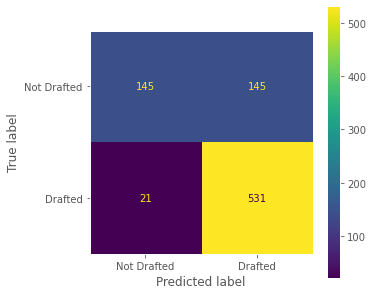

In [108]:
cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

In [ ]:
df_pred = df_combine.copy()

In [ ]:
df_pred['predict'] = -1

In [ ]:
df_pred.at[X_train.index,'predict'] = y_train_pred
df_pred.at[X_test.index,'predict'] = y_test_pred
df_pred['correct'] = df_pred['Drafted']*df_pred['predict'] + (1-df_pred['Drafted'])*(1-df_pred['predict'])

In [ ]:
df_pred.describe()

In [ ]:
cf = confusion_matrix(df_pred[df_pred['Missing_Athletic_Tests']==0]['Drafted'], 
                      df_pred[df_pred['Missing_Athletic_Tests']==0]['predict'])

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

### Pipeline for Cross Validation
Below, I create a pipeline for processing and fitting models with cross validation and grid search. The pipeline is needed to prevent data leakage in the cross validation.

Practice making a function transformer.

I want my transformer to work on specific columns (which I can specify in the pipeline), but it should use other information in the data to do the transformation. In this case, I want to get z-scores of certain columns, but treat each position separately within the columns.

In [142]:
def StandardScalerByPosition(X):
    """
    This function is a custom standard scaler that takes standardizes each
    football position separately.
    
    Input: pandas DataFrame
    It can't just be a numpy array because the column names are needed
    
    Output: pandas DataFrame of transformed data
    Even columns that were not transformed are passed through the function
    """
    cols1 = ['Age']
    cols2 = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle','BMI']
    Xcopy = X.copy()
    for col in cols1:
        Xcopy.loc[Xcopy[col].isna()==True,col] = X.loc[X[col].isna()==False,col].mean()
        Xcopy[col] -= X.loc[X[col].isna()==False,col].mean()
        Xcopy[col] /= X.loc[X[col].isna()==False,col].std()
    for col in cols2:
        for pos in Xcopy['Position'].unique():
            Xcopy.loc[(Xcopy[col].isna()==True) & (Xcopy['Position']==pos),col] = \
            X.loc[(X[col].isna()==False) & (X['Position']==pos),col].mean()
            
            Xcopy.loc[Xcopy['Position']==pos,col] -= X.loc[(X[col].isna()==False) & (X['Position']==pos),col].mean()
            
            Xcopy.loc[Xcopy['Position']==pos,col] /= X.loc[(X[col].isna()==False) & (X['Position']==pos),col].std()
    return Xcopy

In [143]:
X

Age  Height      Weight  Sprint_40yd  Vertical_Jump  Bench_Press_Reps  \
0     20.0  1.8542  106.594207         4.38          85.09              25.0   
1     22.0  1.8796  118.387609         4.84          83.82              27.0   
2     24.0  2.0066  165.107623         5.50            NaN              21.0   
3     23.0  1.8034   92.079251         4.49          93.98              15.0   
4     22.0  1.8796  110.676538         4.76          92.71              26.0   
...    ...     ...         ...          ...            ...               ...   
3472   NaN  1.8034   84.821773         4.48          95.25              11.0   
3473   NaN  1.8288   91.172066         4.51         100.33              13.0   
3474   NaN  1.8034   88.904105         4.47         100.33              15.0   
3475   NaN  1.7526   90.264882         4.51          82.55              18.0   
3476   NaN  1.8288   93.440028          NaN            NaN               NaN   

      Broad_Jump  Agility_3cone  Shuttle        BMI Position  school_group  
0         325.12            NaN      NaN  31.004194       RB             1  
1         292.10           7.38     4.45  33.510073       DE             2  
2            NaN            NaN      NaN  41.005821       OG             1  
3         304.80           7.09     4.23  28.312463       FS             1  
4         304.80           7.10     4.40  31.327425      OLB             2  
...          ...            ...      ...        ...      ...           ...  
3472         NaN            NaN      NaN  26.080939       CB             3  
3473      325.12            NaN      NaN  27.260221       CB             3  
3474      342.90           6.82     4.14  27.336171       CB             3  
3475      292.10           7.21     4.19  29.386861        S             1  
3476         NaN            NaN      NaN  27.938336        S             3  

[3477 rows x 12 columns]

In [150]:
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group', 'Drafted']]
df_fill = StandardScalerByPosition(X)
df_fill[df_fill['Position']=='K']

Age    Height    Weight   Sprint_40yd  Vertical_Jump  \
59    0.017268  1.090268  1.895167 -2.323234e+00            NaN   
595   1.048738  0.601176 -1.178077 -2.733217e-01            NaN   
727   0.017268 -1.355193  0.542940  0.000000e+00            NaN   
783   0.017268 -1.355193 -0.563428  3.416521e-01            NaN   
879   0.017268  1.090268 -0.194639 -1.161617e+00            NaN   
989   1.048738 -0.866101 -0.501963 -9.566259e-01            NaN   
1298  0.017268  0.112084 -0.440498 -6.833042e-02            NaN   
1707 -1.014203  0.112084  0.665870  3.416521e-01            NaN   
1750 -1.014203  2.068452  0.174151  0.000000e+00            NaN   
1761  0.017268 -1.355193 -1.792726 -8.199651e-01            NaN   
1770 -1.014203  0.112084  0.358545  0.000000e+00            NaN   
2062  1.048738  2.557544  1.034659  0.000000e+00            NaN   
2163  0.017268 -1.355193  1.034659  0.000000e+00            NaN   
2245  2.080208  0.112084  2.202492  0.000000e+00            NaN   
2290 -1.014203  0.112084 -0.133174  0.000000e+00            NaN   
2321  0.000000  0.112084 -0.194639  2.733217e-01            NaN   
2323  0.000000 -1.844285 -1.239542 -6.149738e-01            NaN   
2362  0.000000 -1.355193  0.051221  3.416521e-01            NaN   
2385  1.048738  0.601176  0.358545  2.049913e-01            NaN   
2438  0.000000  0.601176  0.788799  0.000000e+00            NaN   
2439  0.000000 -1.844285 -1.116612  0.000000e+00            NaN   
2534  1.048738 -0.377009  0.051221 -8.882955e-01            NaN   
2555  1.048738  0.112084 -0.194639  6.833042e-02            NaN   
2582  0.000000 -0.866101 -1.362472  1.024956e+00            NaN   
2592  0.000000  1.090268  1.034659  1.024956e+00            NaN   
2662  0.000000  0.601176  1.526378 -6.068961e-15            NaN   
2667  0.000000  0.112084  0.297080  2.323234e+00            NaN   
2681  0.000000 -0.377009 -1.116612  7.516347e-01            NaN   
2744  1.048738  0.112084 -0.624893 -1.366608e-01            NaN   
2777  0.000000 -0.866101 -0.993682 -1.024956e+00            NaN   
2833  0.017268 -1.844285 -1.977121 -1.024956e+00            NaN   
2906  0.017268  1.090268 -0.686358  1.366608e-01            NaN   
2919  0.000000  0.601176  0.911729 -4.099825e-01            NaN   
2942  0.000000  0.112084  0.850264  7.516347e-01            NaN   
2956  0.017268  1.579360 -0.010244  1.366608e-01            NaN   
2960  2.080208  0.112084  1.219054  1.708261e+00            NaN   
2977  0.017268  0.601176 -0.317569  1.024956e+00            NaN   
2999  0.017268  0.601176  2.448351  1.776591e+00            NaN   
3066  0.000000  1.090268 -0.624893  3.416521e-01            NaN   
3105  0.017268 -0.377009 -0.809288  3.416521e-01            NaN   
3107  0.000000  0.112084 -0.624893 -2.049913e-01            NaN   
3140  0.000000  0.601176  0.051221 -2.049913e+00            NaN   
3143  0.000000  0.601176  1.096124 -1.161617e+00            NaN   
3160  0.000000  0.112084 -0.379033  0.000000e+00            NaN   
3330  0.000000  0.112084 -0.686358  0.000000e+00            NaN   
3377  0.000000 -0.866101  0.727335  0.000000e+00            NaN   
3379  0.000000 -0.866101 -0.809288  2.049913e-01            NaN   
3390  0.000000 -0.866101 -0.747823  0.000000e+00            NaN   

      Bench_Press_Reps  Broad_Jump  Agility_3cone  Shuttle       BMI Position  \
59            1.142857    0.000000            NaN      NaN  1.153052        K   
595           0.000000    0.000000            NaN      NaN -1.673919        K   
727           0.000000    0.000000            NaN      NaN  1.703603        K   
783           0.000000    0.000000            NaN      NaN  0.406381        K   
879           0.000000    0.707107            NaN      NaN -0.977320        K   
989           0.000000    0.000000            NaN      NaN  0.094106        K   
1298          0.000000    0.000000            NaN      NaN -0.560906        K   
1707          0.000000    0.000000            NaN      NaN  0.630467        K  

In [123]:
from sklearn.preprocessing import FunctionTransformer

In [331]:
func = FunctionTransformer(ImputeAndScaleByPosition)

func.transform(df_combine)

Year            Player       Age            School    Height    Weight  \
0     2009      Beanie Wells -1.838979          Ohio St.  1.462241  1.589628   
1     2009        Will Davis  0.009391          Illinois -1.349221 -0.601748   
2     2009    Herman Johnson  1.884982               LSU  2.500889  3.992144   
3     2009    Rashad Johnson  1.456479           Alabama -0.891864 -0.275926   
4     2009        Cody Brown -0.065261       Connecticut  0.076839  0.164948   
...    ...               ...       ...               ...       ...       ...   
3472  2019   Xavier Crawford  0.000000  Central Michigan -0.217565 -0.730062   
3473  2019      Jordan Brown  0.000000  South Dakota St.  0.417402  0.836873   
3474  2019  Corey Ballentine  0.000000          Washburn -0.217565  0.277253   
3475  2019         Ugo Amadi  0.000000            Oregon -2.342743 -0.511219   
3476  2019    Nasir Adderley  0.000000          Delaware -0.271265  0.403840   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
0       -1.585033      -0.349712          1.239326    1.722030  ...   
1        0.112043       0.078459          0.705919   -0.006282  ...   
2        1.127480       0.000000         -0.892265    0.000000  ...   
3       -0.720185       0.509781         -0.233639   -0.128689  ...   
4        0.628026       0.656356          0.712297    0.292234  ...   
...           ...            ...               ...         ...  ...   
3472    -0.195690       0.639774         -0.839942    0.000000  ...   
3473     0.135567       1.371909         -0.369279    1.066803  ...   
3474    -0.306109       1.371909          0.101385    2.327469  ...   
3475    -0.192050      -0.950479          0.329426   -1.154620  ...   
3476     0.000000       0.000000          0.000000    0.000000  ...   

                              Drafted..tm.rnd.yr.       BMI Player_Type  \
0      Arizona Cardinals / 1st / 31st pick / 2009  0.468497     offense   
1     Arizona Cardinals / 6th / 204th pick / 2009  0.343207     defense   
2     Arizona Cardinals / 5th / 167th pick / 2009  1.681662     offense   
3      Arizona Cardinals / 3rd / 95th pick / 2009  0.555367     defense   
4      Arizona Cardinals / 2nd / 63rd pick / 2009  0.076487     defense   
...                                           ...       ...         ...   
3472                                          NaN -0.536726     defense   
3473                                          NaN  0.415834     defense   
3474                                          NaN  0.477182     defense   
3475                                          NaN  1.738474     defense   
3476                                          NaN  0.565217     defense   

          Position_Type Position Drafted player_code  pro_bowls  \
0       backs_receivers       RB       1    WellCh00          0   
1     defensive_lineman       DE       1    DaviWi99          0   
2     offensive_lineman       OG       1    JohnHe23          0   
3        defensive_back       FS       1    JohnRa98          0   
4           line_backer      OLB       1    BrowCo96          0   
...                 ...      ...     ...         ...        ...   
3472     defensive_back       CB       0        None          0   
3473     defensive_back       CB       0        None          0   
3474     defensive_back       CB       0        None          0   
3475     defensive_back        S       0        None          0   
3476     defensive_back        S       0        None          0   

     Missing_Athletic_Tests  school_group  
0                         2             1  
1                         0             2  
2                         4             1  
3                         0             1  
4                         0             2  
...                     ...           ...  
3472                      3             3  
3473                      2             3  
3474                      0             3  
3475                      0             1  
34